## **Project Name**    -  **E-Commerce Customer Satisfaction Score Prediction**



### **Contribution**    - Individual
### **Name**    - Abhishek Yadav

## **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Customer satisfaction in the e-commerce sector is a pivotal metric that influences loyalty, repeat business, and word-of-mouth marketing. Traditionally, companies have relied on direct surveys to gauge customer satisfaction, which can be time-consuming and may not always capture the full spectrum of customer experiences. With the advent of deep learning, it's now possible to predict customer satisfaction scores in real-time, offering a granular view of service performance and identifying areas for immediate improvement.

**Project Goal**

The primary goal of this project is to develop a deep learning model that can accurately predict the CSAT scores based on customer interactions and feedback. By doing so, we aim to provide e-commerce businesses with a powerful tool to monitor and enhance customer satisfaction in real-time, thereby improving service quality and fostering customer loyalty.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and ANN building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading E-Commerce Dataset in pandas dataframe
dataset=pd.read_csv("eCommerce_Customer_support_data.csv")


In [3]:
# Dataset First
dataset.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [4]:
# Dataset Rows & Columns
dataset.shape

(85907, 20)

In [5]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [6]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

In [7]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


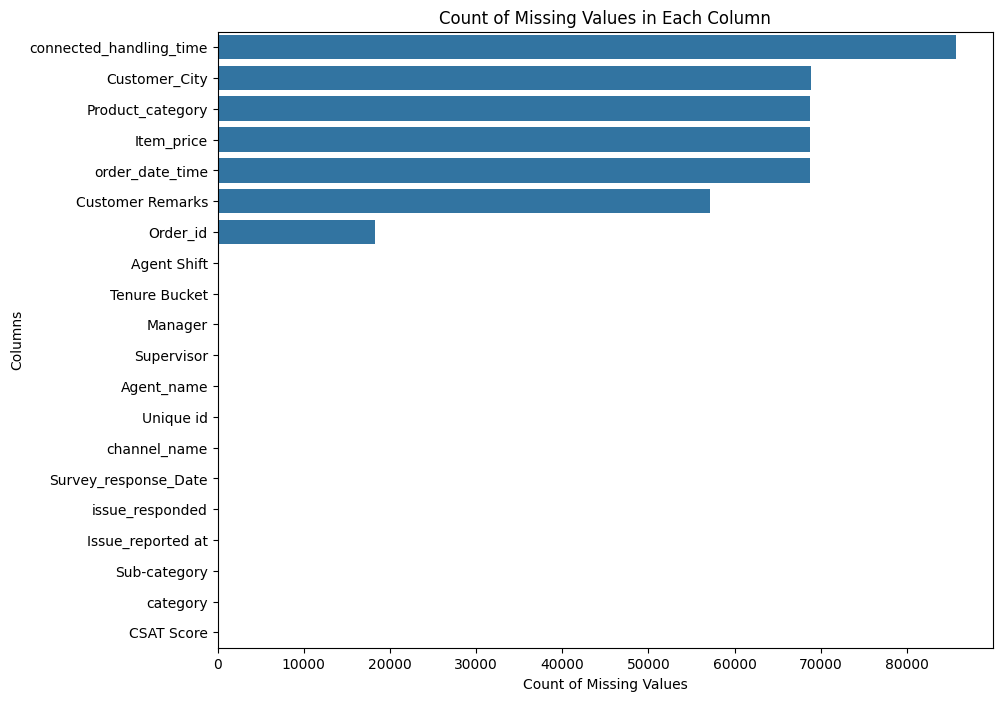

In [8]:
# Visualizing the missing values

# Step 1: Calculate the count of missing values in each column and sort in descending order
missing_values = dataset.isnull().sum().sort_values(ascending=False)


# Step 2: Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_values, y=missing_values.index, orient='h')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns')
plt.title('Count of Missing Values in Each Column')
plt.show()

### What did you know about your dataset?

The dataset given is a dataset from E-Commerce industry, and we have to analysis the customers satisfaction score and the insights behind it.

Customer Satisfaction Score (CSAT) is a key performance indicator (KPI) used to gauge the level of satisfaction customers have with a company's products, services, or overall experience. In the context of e-commerce, CSAT typically measures how happy customers are with their online shopping experience, including aspects like product quality, website usability, delivery speed, and customer service.

CSAT is an essential metric for e-commerce businesses, as it directly reflects the customers' perceptions and experiences, driving both immediate and long-term business success.

The above dataset has 85907 rows and 20 columns. There are no duplicate values in the dataset, but there are  mising values in a few columns such as Customer_city,Product_category,item_price,order_id,order_date_time,customer remarks and connected_handling_time.


## ***1. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [10]:
# Dataset Describe
dataset.describe(include='all')

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Inbound,Returns,Reverse Pickup Enquiry,Good,c27c9bb4-fa36-4140-9f1f-21009254ffdb,09/08/2023 11:55,15/08/2023 10:59,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


**Unique id:** Unique identifier for each record (integer).

**Channel name:** Name of the customer service channel (object/string),3 unique channel name.

**Category:** Category of the interaction (object/string) ,12 unique category.

**Sub-category:** Sub-category of the interaction (object/string),57 unique sub-category.

**Customer Remarks:** Feedback provided by the customer (object/string).

**Order id:** Identifier for the order associated with the interaction (integer).

**Order date time:** Date and time of the order (datetime).

**Issue reported at:** Timestamp when the issue was reported (datetime).

**Issue responded:** Timestamp when the issue was responded to (datetime).

**Survey response date:** Date of the customer survey response (datetime).

**Customer city:** City of the customer (object/string),1782 unique Customer city.

**Product category:** Category of the product (object/string),9 unique product category.

**Item price:** Price of the item (float).

**Connected handling time:** Time taken to handle the interaction (float).

**Agent name:** Name of the customer service agent (object/string),1371 unique agent name.

**Supervisor:** Name of the supervisor (object/string),40 unique Supervisor.

**Manager:** Name of the manager (object/string),6 unique manager.

**Tenure Bucket:** Bucket categorizing agent tenure (object/string).

**Agent Shift:** Shift timing of the agent (object/string).

**CSAT Score:** Customer Satisfaction (CSAT) score (integer) (Target-Variable).

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("unique values in ",i,"is",dataset[i].nunique(),".")

unique values in  Unique id is 85907 .
unique values in  channel_name is 3 .
unique values in  category is 12 .
unique values in  Sub-category is 57 .
unique values in  Customer Remarks is 18231 .
unique values in  Order_id is 67675 .
unique values in  order_date_time is 13766 .
unique values in  Issue_reported at is 30923 .
unique values in  issue_responded is 30262 .
unique values in  Survey_response_Date is 31 .
unique values in  Customer_City is 1782 .
unique values in  Product_category is 9 .
unique values in  Item_price is 2789 .
unique values in  connected_handling_time is 211 .
unique values in  Agent_name is 1371 .
unique values in  Supervisor is 40 .
unique values in  Manager is 6 .
unique values in  Tenure Bucket is 5 .
unique values in  Agent Shift is 5 .
unique values in  CSAT Score is 5 .


## 2. ***Exploratory Data Analaysis (Data Wrangling)***

In [12]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df=dataset.copy()
# Checking Shape of True Value
print("No. of customers interaction and feedbacks with highest customer satisfaction scores  :",len(df[df['CSAT Score']==5]))
# Assigning  customers data to variable df_best_score
df_best_score=df[(df['CSAT Score']==5)]
df_least_score=df[(df['CSAT Score']==1)]

No. of customers interaction and feedbacks with highest customer satisfaction scores  : 59617


### **Q1. Top 5 Product Category with highest Customer Satisfaction Score**

In [13]:
# Groupby Product_category Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Product_category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
Product_category,
Electronics,3009
LifeStyle,2689
Books & General merchandise,2117
Mobile,982
Home,832


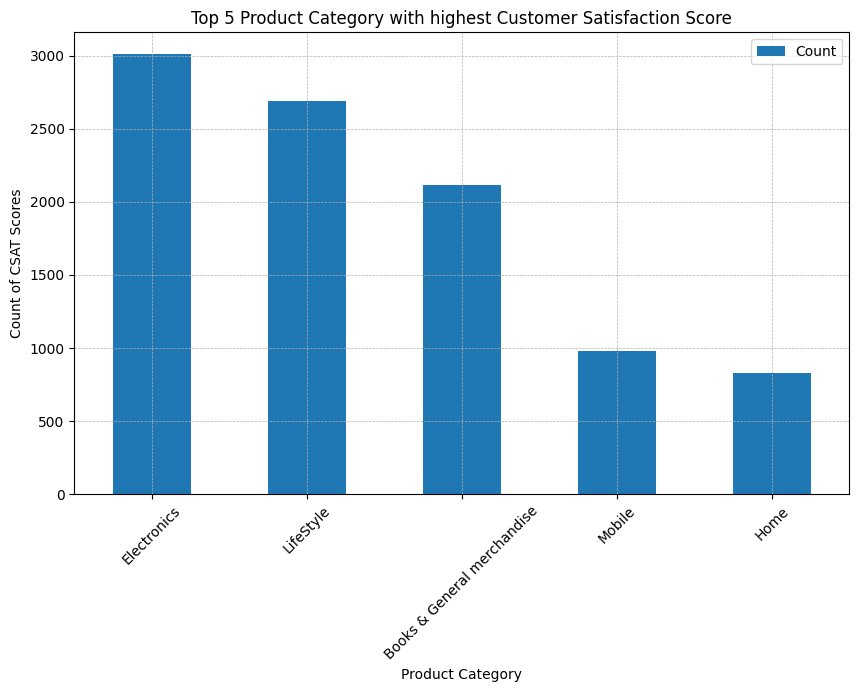

In [14]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Product Category')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Top 5 Product Category with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q2. Top 5 Category with highest customer satisfaction score**

In [15]:
# Groupby Customer_City Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
category,
Returns,31977
Order Related,15090
Refund Related,3137
Product Queries,2257
Shopzilla Related,2009


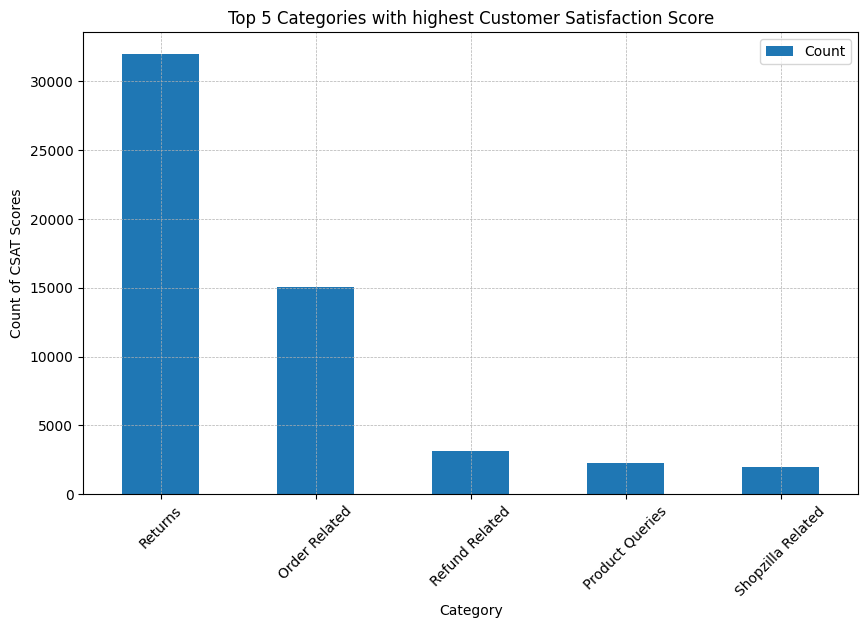

In [16]:


# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Category')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Top 5 Categories with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q3. Top 5 Sub Category with highest Customer Satisfaction Score**

In [17]:
# Groupby Sub-category Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Sub-category').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
Sub-category,
Reverse Pickup Enquiry,15233
Return request,6718
Order status enquiry,4764
Delayed,4604
Fraudulent User,3279


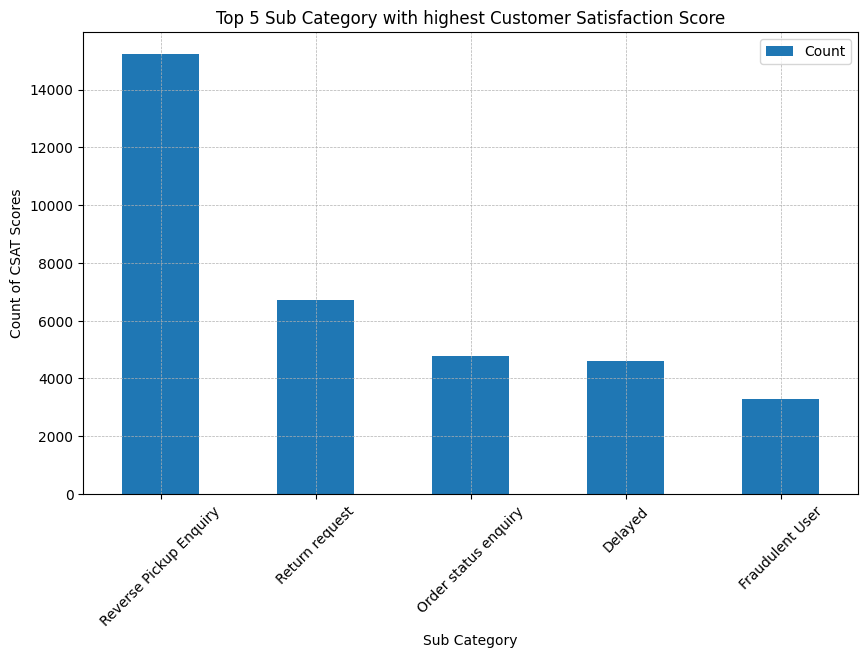

In [18]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Sub Category')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Top 5 Sub Category with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q4. Top 5 cities with highest customer satisfaction score**

In [19]:
# Groupby Customer_City Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Customer_City').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:5]

,Count
Customer_City,
NEW DELHI,425
HYDERABAD,415
PUNE,226
MUMBAI,214
BANGALORE,201


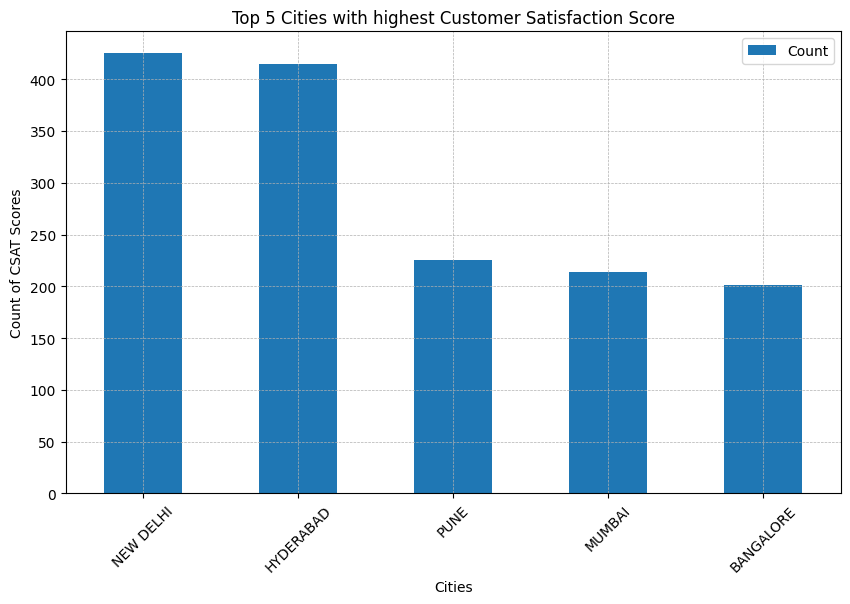

In [20]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Cities')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Top 5 Cities with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q5. Best performing Channels**

In [21]:
# Groupby Channel name Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('channel_name').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df

,Count
channel_name,
Inbound,47419
Outcall,10365
Email,1833


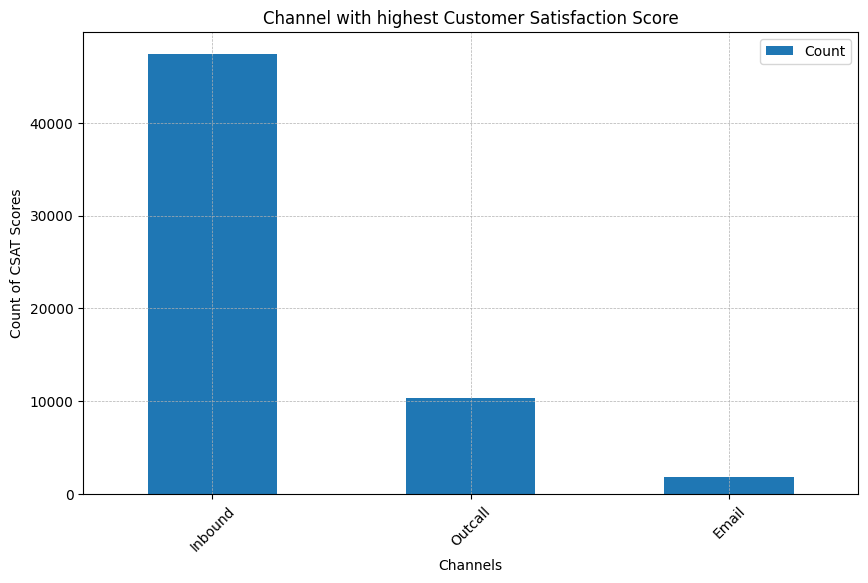

In [22]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:5].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Channels')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Channel with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q6. Top 3 best performing Managers**

In [23]:
# Groupby Manager Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Manager').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Manager,
John Smith,17844
Michael Lee,12353
Jennifer Nguyen,10575


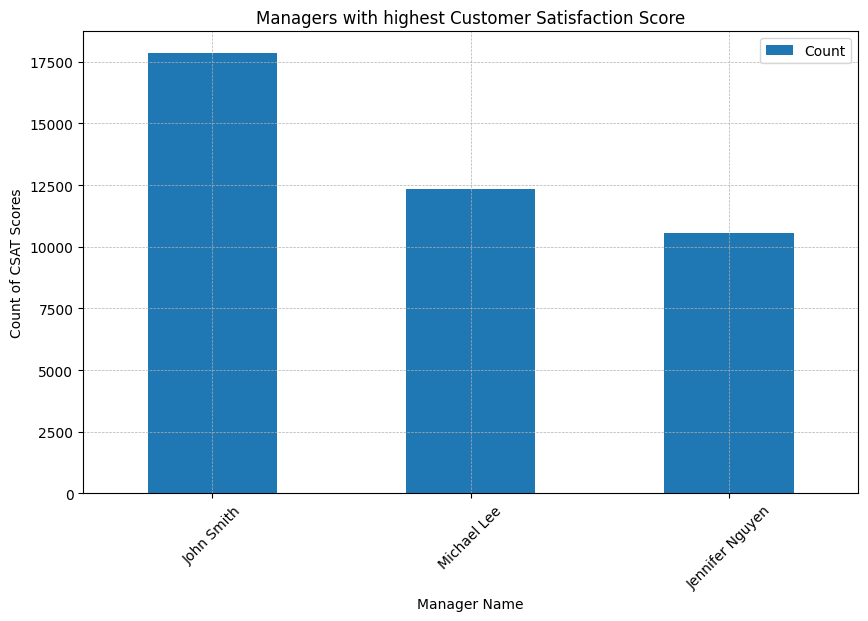

In [24]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Manager Name')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Managers with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q7. Top 3 best performing Agents**

In [25]:
# Groupby Agent_name Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Agent_name').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Agent_name,
Wendy Taylor,299
David Smith,218
Timothy Huff,211


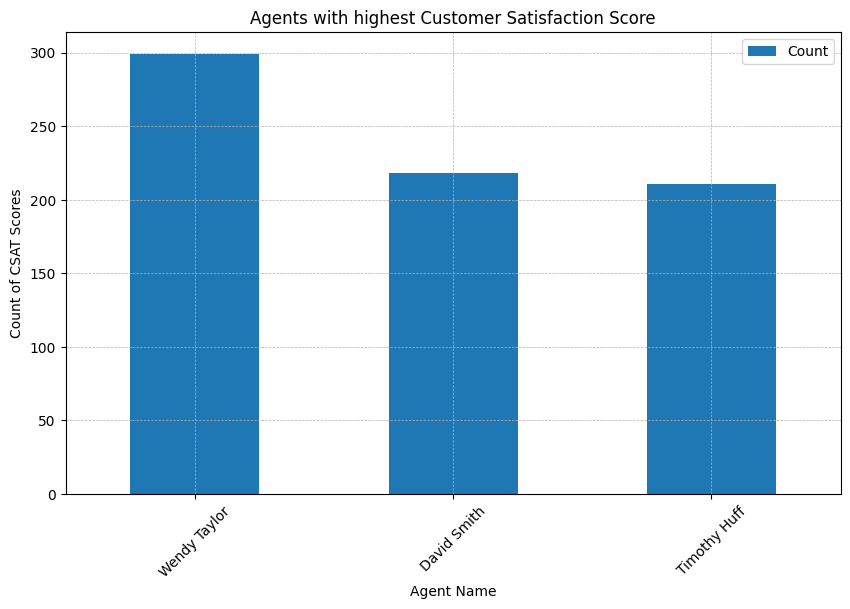

In [26]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Agent Name')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Agents with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q8. Top 3 best performing Supervisors**

In [27]:
# Groupby Supervisor Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Supervisor').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Supervisor,
Carter Park,2921
Elijah Yamaguchi,2870
Nathan Patel,2576


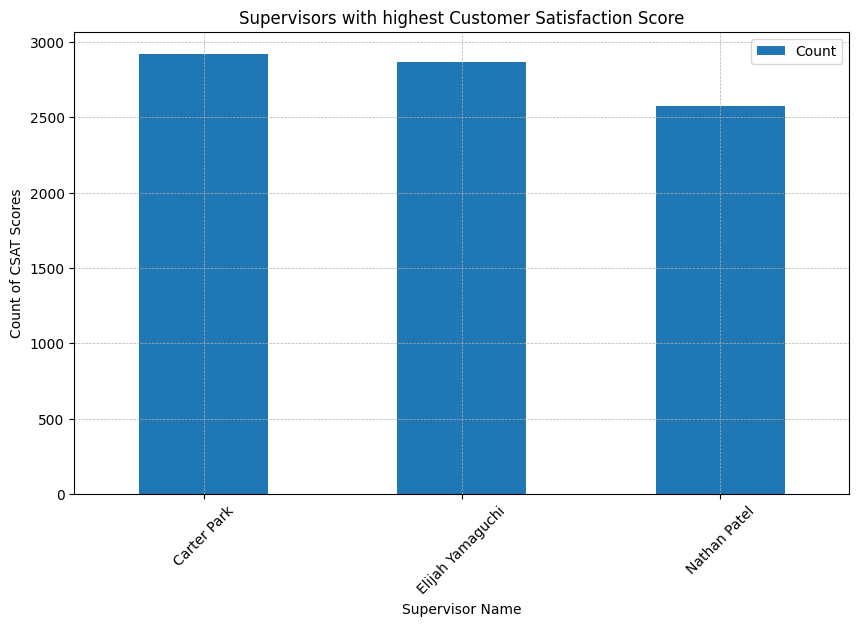

In [28]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Supervisor Name')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Supervisors with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q9. Which tenure group of employees is performing the best?**

In [29]:
# Groupby Supervisor Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Tenure Bucket').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Tenure Bucket,
>90,21678
On Job Training,16860
31-60,8301


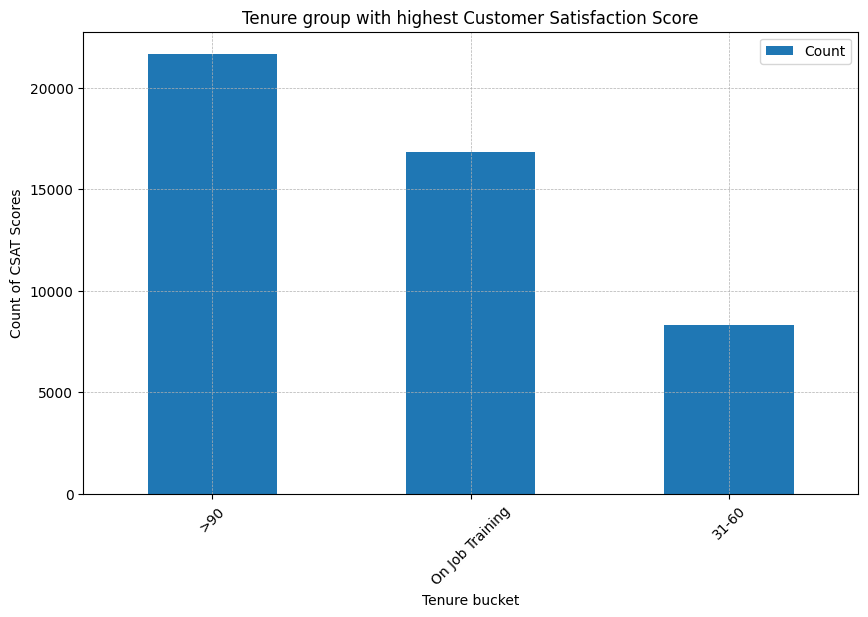

In [30]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Tenure bucket')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Tenure group with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q10. Which shift timings of agents is performing the best?**

In [31]:
# Groupby Supervisor Wise w.r.t Customer satisfaction score data
grouped_df = df_best_score.groupby('Agent Shift').agg(
    Count=('CSAT Score', 'size')
).sort_values(by='Count',ascending=False)

grouped_df[:3]

,Count
Agent Shift,
Morning,28087
Evening,23680
Afternoon,4153


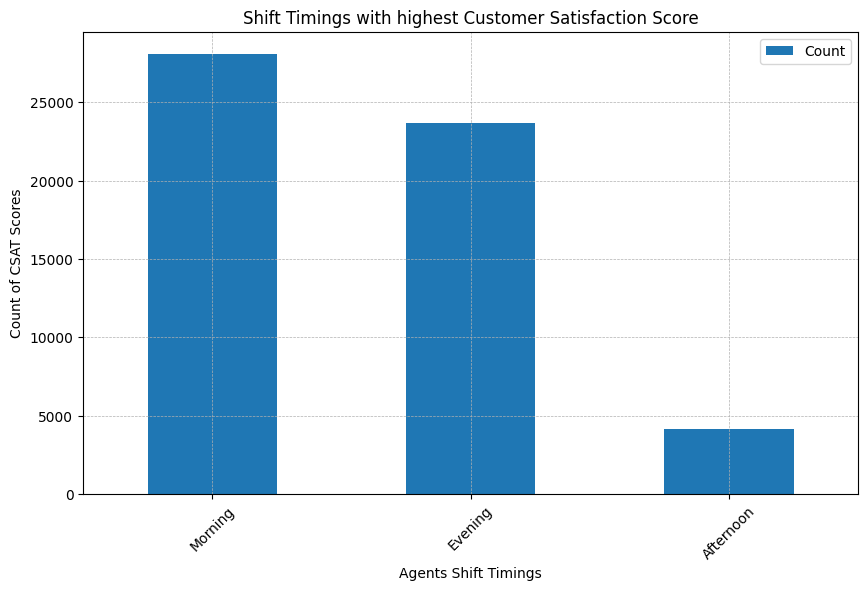

In [32]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df[:3].plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('Agents Shift Timings')
ax.set_ylabel('Count of CSAT Scores')
ax.set_title('Shift Timings with highest Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q11. How response time impacts the customer satisfaction score?**

In [33]:
# Ensure the 'Issue reported at' and 'Issue responded' columns are in datetime format
df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], dayfirst=True)

# Calculate the response time
df['Response_Time'] = df['issue_responded'] - df['Issue_reported at']

# Convert 'Response_Time' to a numerical format in seconds for aggregation
df['Response_Time_seconds'] = df['Response_Time'].dt.total_seconds()

# Groupby CSAT Score and calculate the mean response time
grouped_df = df.groupby('CSAT Score').agg(
    Mean_Response_Time=('Response_Time_seconds', 'mean')
).sort_values(by='Mean_Response_Time', ascending=False)

# Convert the mean response time back to timedelta for readability
grouped_df['Mean_Response_Time'] = pd.to_timedelta(grouped_df['Mean_Response_Time'], unit='s')

# Display the grouped DataFrame
print(grouped_df)

                  Mean_Response_Time
CSAT Score                          
1          0 days 05:50:03.275155833
2          0 days 04:35:34.840218239
3          0 days 03:19:04.222048475
4          0 days 01:55:28.943756128
5          0 days 01:35:06.442122213


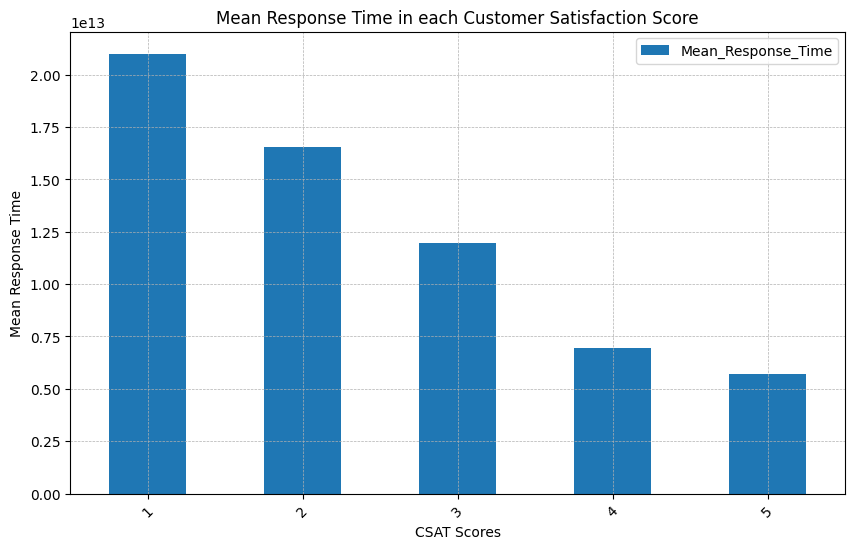

In [34]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('CSAT Scores')
ax.set_ylabel('Mean Response Time')
ax.set_title('Mean Response Time in each Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### **Q12. How customer handling time duration impacts the customer satisfaction score?**

In [35]:
# Groupby Customer satisfaction score data w.r.t customer handling time
grouped_df = df.groupby('CSAT Score').agg(
    Mean_Response_Time=('connected_handling_time', 'mean')
).sort_values(by='Mean_Response_Time', ascending=False)

grouped_df

,Mean_Response_Time
CSAT Score,
3,488.000000
5,470.153005
1,452.187500
4,439.878788
2,296.000000


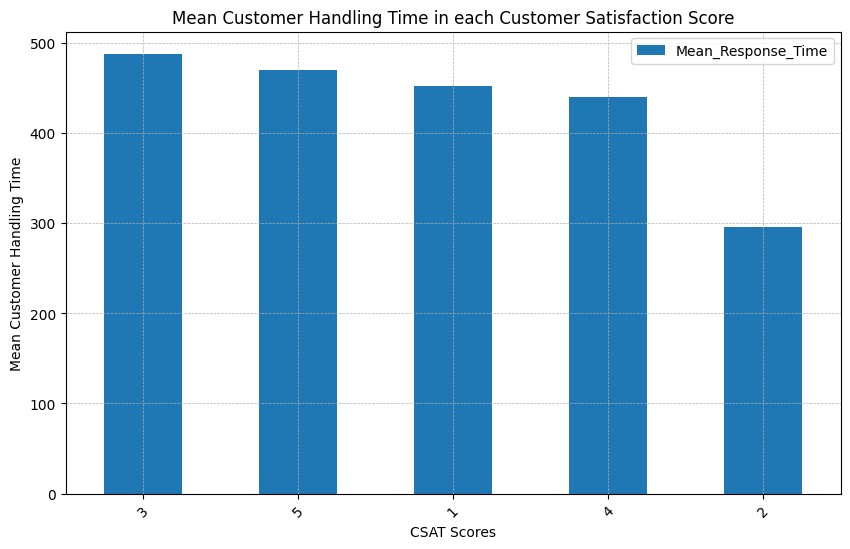

In [36]:
# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.plot(kind='bar', ax=ax)

# Adding labels and title
ax.set_xlabel('CSAT Scores')
ax.set_ylabel('Mean Customer Handling Time')
ax.set_title('Mean Customer Handling Time in each Customer Satisfaction Score')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

### What all manipulations have you done and insights you found?

Based on the provided data, we aimed to gain a clear understanding of customer satisfaction scores through graphical representations. However, it is crucial to delve deeper into the behavior of customers with varying satisfaction scores to uncover insights and hypothetical statements that might explain the reasons behind these scores. Thus, I focused on the data of customers with high satisfaction scores to identify patterns and potential reasons for their satisfaction.

Potential reasons for lower customer satisfaction scores are noted below based on the findings from the analysis:

**Insights from Analysis:**

**Response Time:** Identified that longer response times were correlated with lower customer satisfaction scores. This suggests a need for quicker response mechanisms.

**Product Category:** Found that certain product categories had consistently lower satisfaction scores, indicating potential issues with these products or their support processes.

**Channel Name:** Discovered that certain customer service channels were more effective at resolving issues satisfactorily, leading to higher CSAT scores.

**Agent Tenure:** Noted that agents with longer tenures tended to receive higher satisfaction scores, suggesting that experience plays a crucial role in customer service effectiveness.

**Shift Timings:** Found variations in satisfaction scores based on agent shifts, with some shifts having lower scores, possibly due to higher workloads or fewer resources during those times.

**Customer Feedback:** Analyzed customer remarks to identify common themes and keywords associated with low satisfaction scores, providing qualitative insights into customer pain points.



## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on Dependant Variable i.e., CSAT Score (Univariate)

CSAT Score
5    59617
1    11230
4    11219
3     2558
2     1283
Name: count, dtype: int64
 


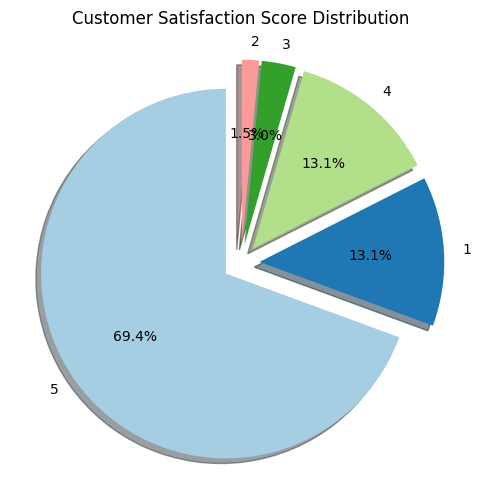

In [37]:
# Chart - 1 visualization code
# Dependant Column Value Counts
# Display the value counts of the 'CSAT Score' column
print(df['CSAT Score'].value_counts())
print(" ")

# Visualize the 'CSAT Score' value counts as a pie chart
df['CSAT Score'].value_counts().plot(
    kind='pie',
    figsize=(15, 6),
    autopct="%1.1f%%",
    startangle=90,
    shadow=True,
    labels=df['CSAT Score'].value_counts().index,
    colors=plt.cm.Paired(range(len(df['CSAT Score'].value_counts()))),
    explode=[0.1] * len(df['CSAT Score'].value_counts())  # Slightly explode all slices for better visibility
)

# Set the title and display the plot
plt.title('Customer Satisfaction Score Distribution')
plt.ylabel('')  # Hide the y-label as it's redundant in a pie chart
plt.show()

##### 1. Why did you pick the specific chart?
A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?
Based on the chart, I observed that 59,617 customers rated the service with a CSAT Score of 5, which accounts for 69.4% of the total feedback in the dataset. Conversely, 1,283 customers were dissatisfied and gave a CSAT Score of 2, representing 1.5% of the total responses.

Additionally, 13.1% of customers gave a poor CSAT score of 1, another 13.1% rated it as 4, and 3% of customers provided a score of 3. This means nearly 15% of customers experienced poor service. Therefore, it is crucial to examine the factors contributing to this dissatisfaction.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Yes, the gained insights will help create a positive business impact. Here's how:

**Focus on Strengths:** Knowing that 69.4% of customers rated the service with a CSAT score of 5 indicates a strong positive reception. By analyzing what is working well for these satisfied customers, the business can replicate these strategies across other areas to further enhance customer satisfaction.

**Targeted Improvements:** Identifying that 15% of customers are experiencing poor service (CSAT scores of 1, 2, and 3) allows the business to focus on specific areas of improvement. Understanding the reasons behind these low scores can help address the root causes, such as response time, service quality, or specific product issues.

**Resource Allocation:** Insights into customer satisfaction distribution can guide the allocation of resources. For instance, more training and support can be provided to agents or departments that receive lower scores to elevate their performance.

**Strategic Planning:** The data can be used to set targeted goals for improvement in customer satisfaction metrics, driving a continuous improvement culture within the organization.
Are there any insights that lead to negative growth? Justify with specific reasons.

While the insights primarily aim to create a positive impact, if not properly managed, they could potentially lead to negative growth:

**Neglecting High Performers:** If the focus shifts too heavily on addressing negative feedback without recognizing and maintaining what leads to high satisfaction (69.4% with a score of 5), there is a risk of neglecting the positive aspects. This could inadvertently lead to a decline in the areas that are currently performing well.

**Inadequate Response to Poor Scores:** If the business fails to adequately address the issues leading to the 15% of poor scores, customer dissatisfaction could worsen. Dissatisfied customers are more likely to churn, leave negative reviews, and dissuade potential customers, negatively impacting growth.
Overemphasis on Quick Fixes: Prioritizing quick fixes over sustainable, long-term solutions can lead to temporary improvements in CSAT scores without addressing underlying issues. This might result in a superficial improvement in customer satisfaction but could cause long-term dissatisfaction if deeper problems are ignored.

**Justification with Specific Reasons**

**Positive Business Impact:** The insights provide a clear indication of customer satisfaction levels and areas needing improvement. For instance, since a significant majority (69.4%) are highly satisfied, the business can study and reinforce the strategies that contribute to high satisfaction. Additionally, addressing the 15% of poor scores by understanding and resolving their causes will likely result in improved overall customer satisfaction and loyalty.

**Potential for Negative Growth:** Ignoring the insights related to low satisfaction scores or failing to act on them effectively could lead to increased dissatisfaction. For example, if the business does not address the issues faced by the 1.5% of customers who gave a score of 2, this dissatisfaction can spread, potentially leading to higher churn rates and negative word-of-mouth. Similarly, failing to balance efforts between maintaining high satisfaction levels and improving lower ones can also be detrimental.

In conclusion, the insights have the potential to drive positive business impact by highlighting areas of strength and weakness. However, careful and balanced management of these insights is crucial to avoid any negative consequences and ensure sustained growth and customer satisfaction.

#### Chart - 2 - Agent Vs. Average Response Time Percentage (Bivariate with Categorical - Numerical)

           Agent_name  Average Response Time %
0    Christine Castro             4.091571e+06
1  Virginia Mccormick             3.408857e+06
2     Dennis Campbell             3.225120e+06
3      Melissa Spence             3.156000e+06
4       Glenda Powell             3.137727e+06
5         John Nelson             3.062105e+06
6           Ryan Khan             3.034560e+06
7      Shane Humphrey             3.014000e+06
8       Donald Jordan             2.954571e+06
9      Elizabeth Rose             2.912348e+06
 


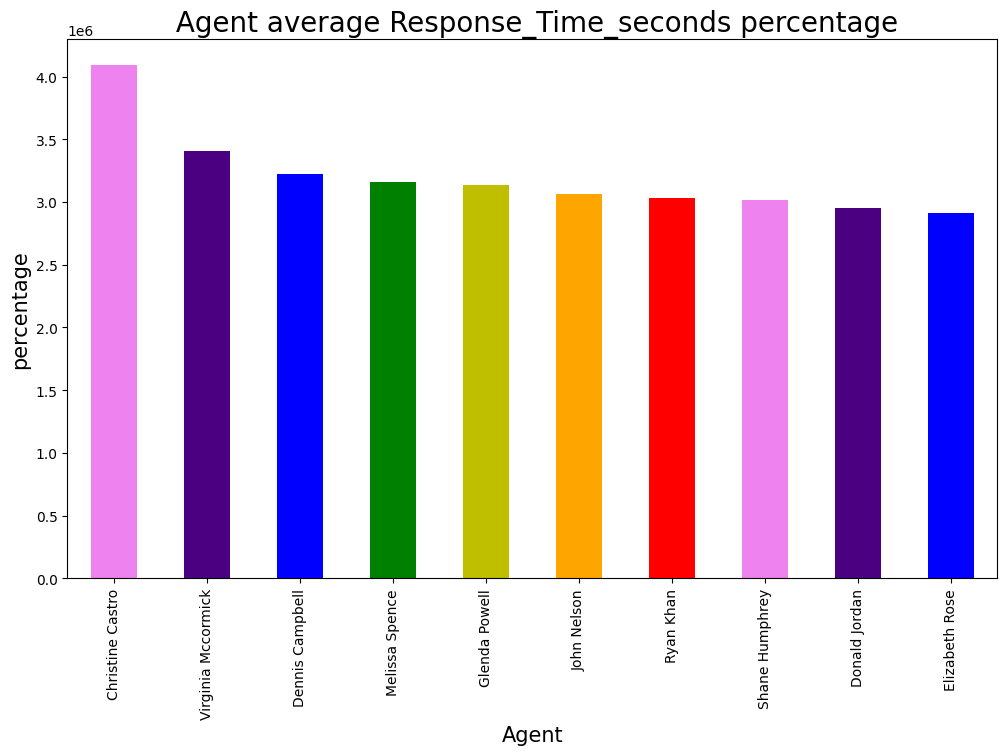

In [38]:
# Chart - 2 visualization code
# Showing Average True Churn Percentage state wise
# Showing top 10 churned state
print((df.groupby(['Agent_name'])['Response_Time_seconds'].mean()*100).sort_values(ascending = False).reset_index(name="Average Response Time %").head(10))
print(" ")

# State vs. average true churn percantage visualization code
# Vizualizing top 10 churned state
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['Agent_name'])['Response_Time_seconds'].mean())*100).sort_values(ascending = False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" Agent average Response_Time_seconds percentage", fontsize = 20)
plt.xlabel('Agent', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

##### 1. Why did you pick the specific chart?
Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of response time with respect to agents, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?
There are 10 agents with varying average response times.

The average response times by agent range from 2.09 to 4.09 hours. Elizabeth Rose and Donald Jordan have the shortest average response times, providing the best service to their clients through prompt action.

On the other hand, Christine Castro has the longest average response time for addressing client queries. Therefore, evaluating her performance and providing additional training is crucial to enhance the CSAT Score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Yes, the insights gained can help create a positive business impact. By identifying which agents have the shortest and longest response times, businesses can take specific actions to improve overall customer satisfaction:

**Performance Recognition:** Recognizing and rewarding agents like Elizabeth Rose and Donald Jordan for their exemplary service can boost morale and set a benchmark for other agents.

**Targeted Training:** Providing additional training and support to agents like Christine Castro can help reduce response times, leading to better customer experiences and potentially higher CSAT scores.

**Resource Allocation:** Understanding the distribution of response times can help in reallocating resources and support where needed most, ensuring a more balanced and efficient customer service operation.

**Process Improvements:** Identifying bottlenecks and inefficiencies in the service process can lead to improvements that benefit all agents and customers, enhancing overall service quality.

**Are there any insights that lead to negative growth?**

There are no direct insights that would lead to negative growth; however, if not acted upon appropriately, some insights could potentially have a negative impact:

**Failure to Address Poor Performance:** If agents with high response times are not given the necessary training and support, customer dissatisfaction may continue or worsen, leading to negative reviews and loss of customers.

**Ignoring Top Performers:** Not recognizing and rewarding top-performing agents could lead to decreased motivation and performance over time, potentially affecting overall service quality.

**Overemphasis on Speed:** Focusing solely on reducing response times without maintaining quality of service might lead to rushed interactions and unresolved issues, which could harm customer satisfaction in the long run.

**Justification with Specific Reasons**

**Positive Business Impact:** By addressing the variations in response times, the business can ensure a more consistent and satisfactory customer experience. For instance, agents like Elizabeth Rose and Donald Jordan, who provide quick responses, set a standard for others. This can be leveraged through training programs to improve the performance of other agents.

**Potential for Negative Growth:** If insights are ignored, such as the need for retraining agents with higher response times like Christine Castro, customer dissatisfaction may persist. Dissatisfied customers are more likely to churn and spread negative word-of-mouth, which can harm the business’s reputation and growth prospects.

In conclusion, the insights gained will likely foster a positive business impact if acted upon effectively, leading to improved customer satisfaction and service quality. However, neglecting these insights or mismanaging the response to them could result in negative growth.

#### Chart - 3 - Box Plot on Connected handling time with CSAT Score (Bivariate)

<Axes: title={'center': 'connected_handling_time'}, xlabel='CSAT Score'>

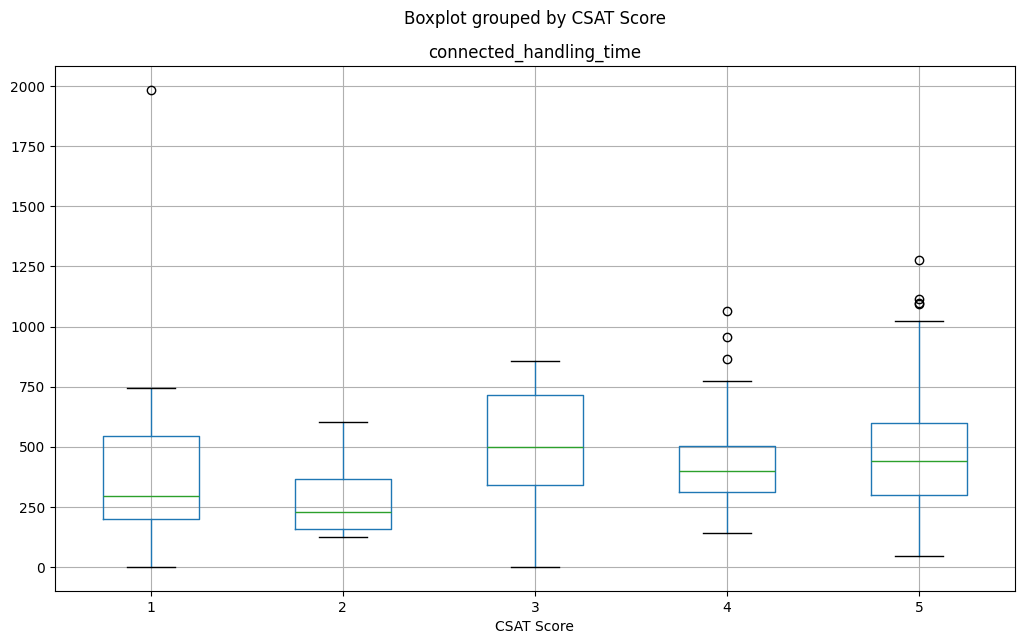

In [39]:
# Box Plot for connected_handling_time attribute w.r.t to CSAT Score
df.boxplot(column='connected_handling_time',by='CSAT Score')

##### 1. Why did you pick the specific chart?
Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers. So, I used box plot to get the maximum and minimum value with well sagreggated outliers with well defined mean and median as shown in the box plot graph.
##### 2. What is/are the insight(s) found from the chart?
From the above boxplot, we can observe that there are a few outliers in the CSAT Scores of 4 and 5. Specifically, outliers appear when the connected handling time exceeds 750 for CSAT Score 4, and when it exceeds 1000 for CSAT Score 5. Analyzing these outliers is crucial for understanding the underlying factors contributing to these anomalies.
##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Yes, the insights gained can help create a positive business impact. Here's how:

**Targeted Improvements:** By identifying outliers in CSAT Scores when the connected handling time is high, the business can focus on improving processes that lead to long handling times. Reducing these handling times can enhance customer satisfaction.
**Quality Control:** Understanding why CSAT Scores drop when handling times increase will allow the business to implement quality control measures. This can involve additional training for agents, better resource allocation, or process optimizations.
**Customer Experience Enhancement:** By addressing the factors leading to long handling times and subsequent lower satisfaction scores, the business can improve the overall customer experience, which can lead to increased loyalty and positive word-of-mouth.

Are there any insights that lead to negative growth?

While the primary goal of the insights is to foster positive business impact, there could be potential risks if not managed properly:

**Overemphasis on Speed:** If the business focuses too much on reducing handling times without ensuring the quality of interactions, it might lead to rushed and ineffective customer service. This can result in unresolved issues and lower overall satisfaction.

**Neglecting Non-Outlier Data:** Focusing exclusively on outliers might lead to neglecting the broader dataset. Improvements should be holistic, ensuring that all areas of customer service are enhanced, not just those with extreme values.


**Justification with Specific Reasons**

**Positive Business Impact:** Addressing the outliers in CSAT Scores related to high handling times can directly improve customer satisfaction by ensuring quicker and more efficient service. For instance, by training agents to handle calls more effectively or by implementing better call routing systems, the business can reduce handling times and thus improve scores.

**Potential for Negative Growth:** If the business focuses solely on reducing handling times without maintaining the quality of interactions, it may lead to superficial improvements in satisfaction scores. For example, customers might experience quicker service but still be dissatisfied if their issues are not fully resolved. Additionally, neglecting other areas in need of improvement can result in an overall decline in service quality.

In conclusion, while the insights can lead to positive business impacts by targeting and resolving specific issues, a balanced and comprehensive approach is essential to avoid any potential negative growth and ensure sustainable improvements in customer satisfaction.

#### Chart - 4 - CSAT Score vs Item price (Bivariate)

CSAT Score
1    884880.106888
2    607171.686747
3    621245.774648
4    520632.596685
5    471334.794724
Name: Item_price, dtype: float64
 


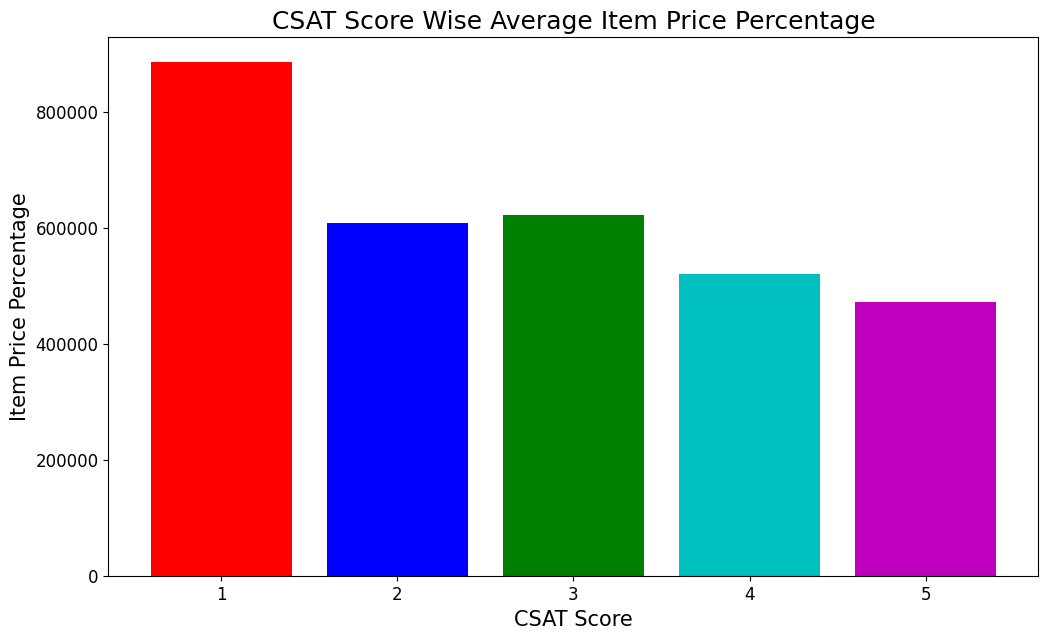

In [40]:
# Chart - 4 visualization code
# CSAT Score wise average Item_price Percentage
# Calculate the average item price percentage by CSAT Score
csat_avg_item_price_percentage = dataset.groupby('CSAT Score')['Item_price'].mean() * 100
print(csat_avg_item_price_percentage)
print(" ")

# Visualizing the CSAT Score wise average item price percentage
plt.bar(csat_avg_item_price_percentage.index, csat_avg_item_price_percentage, color=['r', 'b', 'g', 'c', 'm'])

plt.rcParams['figure.figsize'] = (10, 6)  # Adjust the figure size
plt.xlabel('CSAT Score', fontsize=15)
plt.ylabel('Item Price Percentage', fontsize=15)
plt.title('CSAT Score Wise Average Item Price Percentage', fontsize=18)
plt.xticks(csat_avg_item_price_percentage.index, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

##### Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Yes, the insights can help create a positive business impact in the following ways:

**Pricing Strategy:** Understanding that higher item prices are associated with lower CSAT scores can guide pricing strategies. By adjusting prices or offering better value at higher price points, businesses can improve customer satisfaction.

**Customer Segmentation:** These insights can help in segmenting customers based on their spending behavior and satisfaction levels. Targeted promotions and personalized offers can be designed to enhance satisfaction among different customer segments.

 **Are there any insights that lead to negative growth?**

There are potential risks if the insights are not managed properly:

**Price Reduction Risks:** Simply lowering prices to improve CSAT scores might not be sustainable and could negatively impact profitability. Businesses need to balance price adjustments with maintaining profit margins.

**Overemphasis on Price:** Focusing solely on price without addressing other factors that contribute to customer satisfaction (such as product quality, customer service, and overall experience) may not yield the desired improvement in CSAT scores.

**Justification with Specific Reasons**

**Positive Business Impact:** By aligning pricing strategies with customer expectations, businesses can enhance customer satisfaction. For instance, offering more features or better service for higher-priced items can justify the cost and improve CSAT scores. Additionally, personalized marketing strategies based on customer segments can lead to increased loyalty and repeat purchases.

**Potential for Negative Growth:** If businesses reduce prices without maintaining value, it can lead to a perception of reduced quality. For example, if a high-end product's price is reduced significantly without adding corresponding value, customers might perceive it as less premium, leading to lower sales. Additionally, overemphasizing price reductions can erode profit margins, affecting the overall financial health of the business.

In conclusion, while the insights provide valuable guidance for improving customer satisfaction and driving positive business impact, it is crucial to implement them thoughtfully. Balancing price adjustments with value enhancement and considering all factors affecting customer satisfaction will help avoid potential negative consequences and ensure sustainable growth.



#### Chart - 5- Column wise Histogram & Box Plot Univariate Analysis

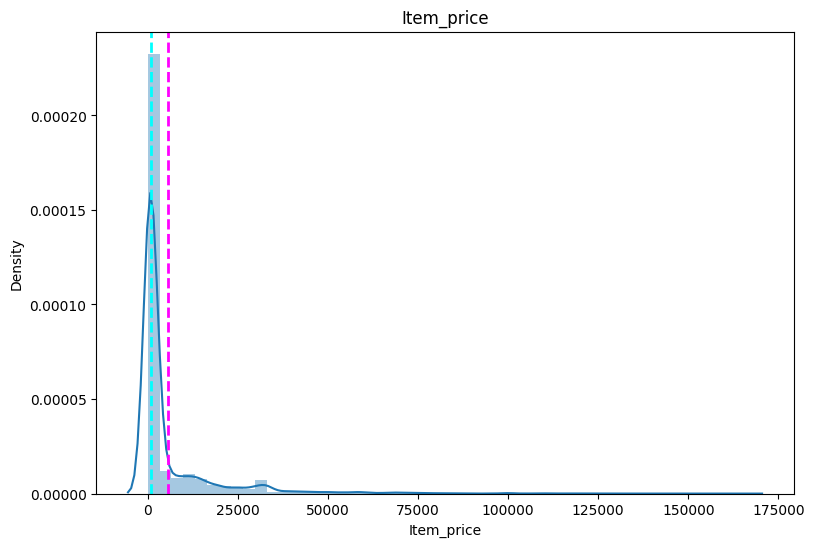

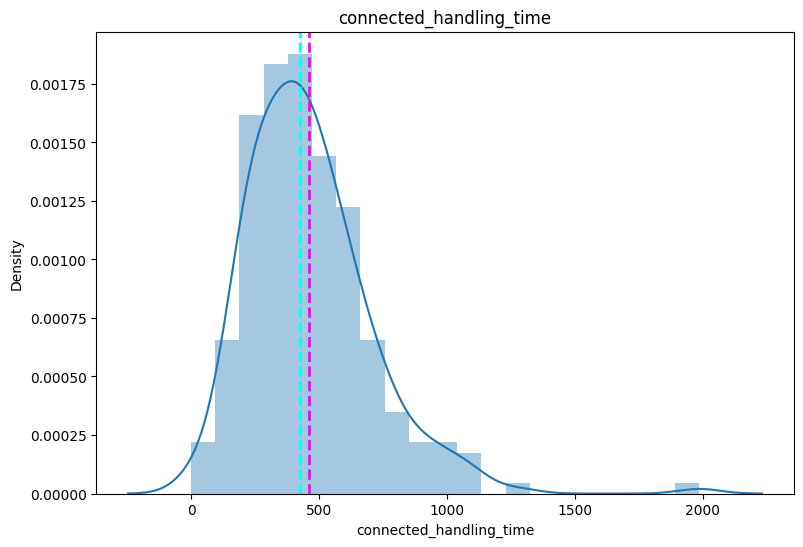

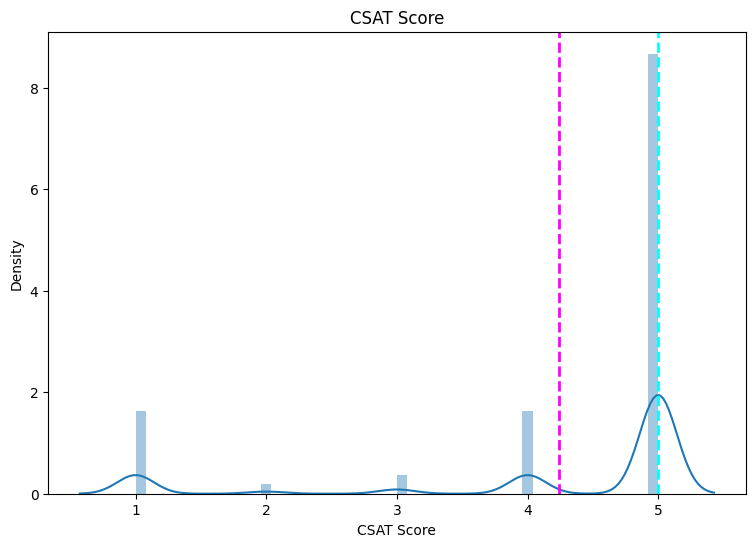

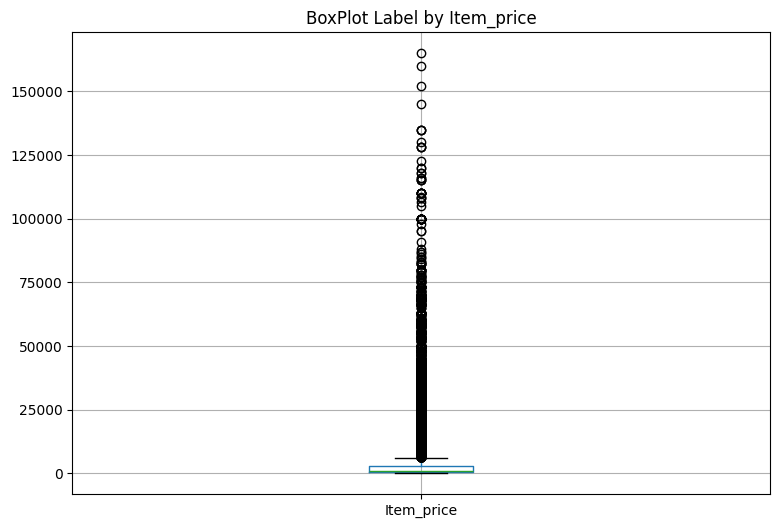

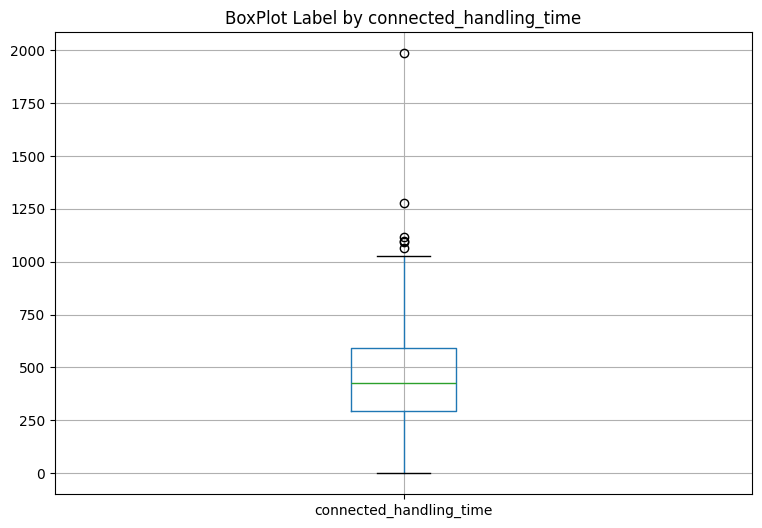

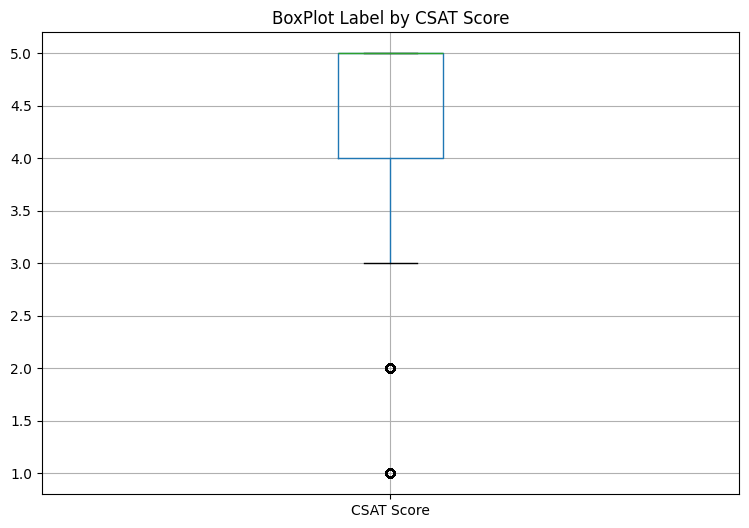

In [41]:
# Chart - 5 visualization code
# Visualizing code of hist plot for each columns to know the data distibution
for col in dataset.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (dataset[col])
  sns.distplot(dataset[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

# Visualizing code of box plot for each columns to know the data distibution
for col in dataset.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot( col, ax = ax)
    ax.set_title('BoxPlot Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()


##### 1. Why did you pick the specific chart?
The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.
##### 2. What is/are the insight(s) found from the chart?
The "Connected Handling Time" feature is symmetrically distributed, with the mean being almost the same as the median for numerical columns. However, the "Item Price" feature does not follow a symmetric distribution and contains noise.
##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Just a histogram and box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.


#### Chart - 6 - Correlation Heatmap

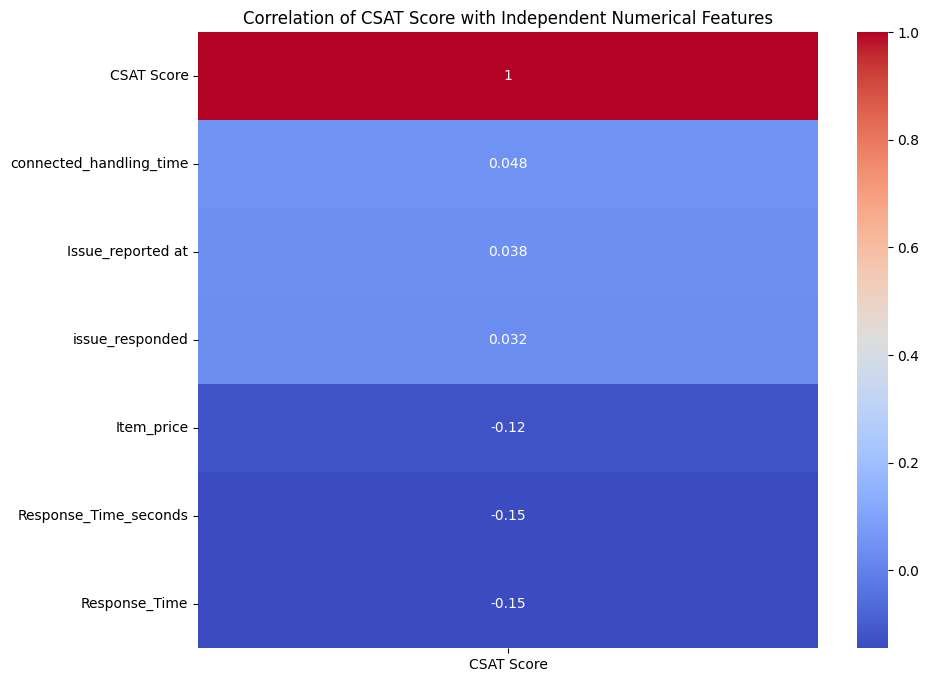

In [42]:
# Calculate the correlation matrix
correlation_matrix = df[df.describe().columns.to_list()].corr()

# Select only the correlation of the target variable with other features
target_variable='CSAT Score'
correlation_with_target = correlation_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', cbar=True)
plt.title(f'Correlation of {target_variable} with Independent Numerical Features')
plt.show()


##### 1. Why did you pick the specific chart?
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.
##### 2. What is/are the insight(s) found from the chart?
Based on the above correlation heatmap, we can see that "Issue Reported," "Issue Responded," and "Connected Handling Time" are moderately positively correlated with the CSAT Score.

Additionally, "Connected Handling Time" has a positive correlation with the CSAT Score and a negative correlation with both "Response Time" and "Item Price."

All other correlations can be observed from the chart.


#### Chart - 7 - Pair Plot

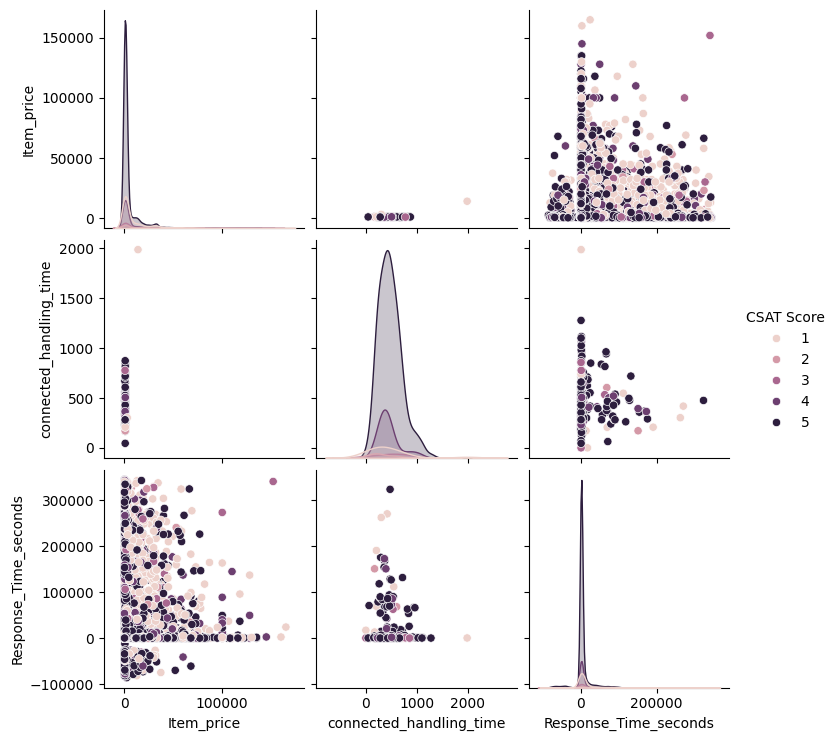

In [43]:
# Pair Plot visualization code
sns.pairplot(df, hue="CSAT Score")

##### 1. Why did you pick the specific chart?
Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.
##### 2. What is/are the insight(s) found from the chart?
From the above chart I got to know, there are less linear relationship between variables and data points aren't linearly separable. Customers feedback data is clusetered and ovearlapped each other. connected_handling_time are quite symmetrical in nature and item_price feature and response time are quite non symmetric in nature. In this whole pair plot, the importance of response time can be seen and the connected_hanling_time with respect to different features are really insightful. Rest insights can be depicted from the above graph.

## ***5. Hypothesis Testing***
Based on your chart experiments, define two hypothetical statements from the dataset. In the next two questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


### **Hypothetical Statement - 1**
When the Mean Response Time is less than 2, the Customer Satisfaction Score is 5.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
Null Hypothesis (H0): The mean Response Time is equal to 2 when the CSAT Score is 5.

Alternative Hypothesis (H1): The mean Response Time is less than 2 when the CSAT Score is 5.

Perform One-Sample t-test:

We will use a one-sample t-test to compare the sample mean of Response Time against the population mean (2).


#### 2. Perform an appropriate statistical test.

In [44]:
import pandas as pd
from scipy.stats import ttest_1samp



# Step 1: Filter the data for CSAT Score of 5
df_csat_5 = df[df['CSAT Score'] == 5]

# Step 2: Calculate the mean Response Time
mean_response_time = df_csat_5['Response_Time_seconds'].mean()

# Step 3: Perform one-sample t-test
# Null Hypothesis: Mean Response Time = 2*3600 (2 hours converted to seconds)
hypothesized_mean = 2 * 3600  # 2 hours in seconds

# Perform the t-test
t_stat, p_value = ttest_1samp(df_csat_5['Response_Time_seconds'], hypothesized_mean)

# Print the results
print(f"Mean Response Time: {mean_response_time} seconds")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Step 4: Conclusion
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the Null Hypothesis: The mean Response Time is significantly less than 2 hours when the CSAT Score is 5.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant evidence that the mean Response Time is less than 2 hours when the CSAT Score is 5.")


Mean Response Time: 5706.442122213462 seconds
T-statistic: -11.851353227147445
P-value: 2.3024549173963388e-32
Reject the Null Hypothesis: The mean Response Time is significantly less than 2 hours when the CSAT Score is 5.


##### Which statistical test have you done to obtain P-Value?
I have used t-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.

Based on the results of the one-sample t-test, the following findings can be made:

**Mean Response Time:**

The mean response time for customers who gave a CSAT Score of 5 is approximately 5706.44 seconds (about 1.58 hours).

**T-statistic and P-value:**

The t-statistic is -11.85, indicating that the observed mean response time is significantly different from the hypothesized mean of 7200 seconds (2 hours).
The p-value is extremely small (2.30e-32), which is far below the significance level of 0.05.

**Conclusion:**

Given the p-value is much less than the significance level of 0.05, we reject the null hypothesis.

This means there is strong statistical evidence to conclude that the mean response time for customers who rated the service with a CSAT Score of 5 is significantly less than 2 hours.

**Business Implication:**

The significantly lower response time for customers with a high satisfaction score suggests that prompt response times are correlated with higher customer satisfaction.

Focusing on reducing response times could be a key strategy to enhance overall customer satisfaction.

This analysis indicates that improving response times can positively impact customer satisfaction scores, supporting efforts to maintain or enhance quick response rates in customer service operations.

##### Why did you choose the specific statistical test?
**Rationale for Choosing the One-Sample T-Test:**

**Nature of the Data:**

We have a single sample of response times for customers who gave a CSAT Score of 5.

We need to compare the mean of this sample to a known value (2 hours or 7200 seconds).

**Continuous Variable:**

Response time is a continuous variable measured in seconds.
The t-test is suitable for comparing means of continuous data.

**Comparing to a Hypothesized Value:**

The one-sample t-test is designed to determine whether the sample mean is significantly different from a known or hypothesized population mean.
In this case, we are comparing the mean response time to the hypothesized value of 7200 seconds (2 hours).

**Small Sample Size or Unknown Population Variance:**

If the population variance is unknown and the sample size is reasonably small, the t-test is appropriate as it accounts for sample size in its calculation.
The t-distribution is used instead of the normal distribution when the sample size is small or the population variance is unknown.

**Conclusion:**

The one-sample t-test was chosen because it effectively tests whether the mean response time for a sample (customers who rated the service with a CSAT Score of 5) is significantly different from a specified value (2 hours). The test provides a t-statistic and p-value that help determine if the observed difference is statistically significant, thereby allowing us to make an informed conclusion regarding the hypothesis.

This choice of test aligns with the objective of assessing the mean response time against a benchmark, making it a suitable and robust statistical method for this analysis.

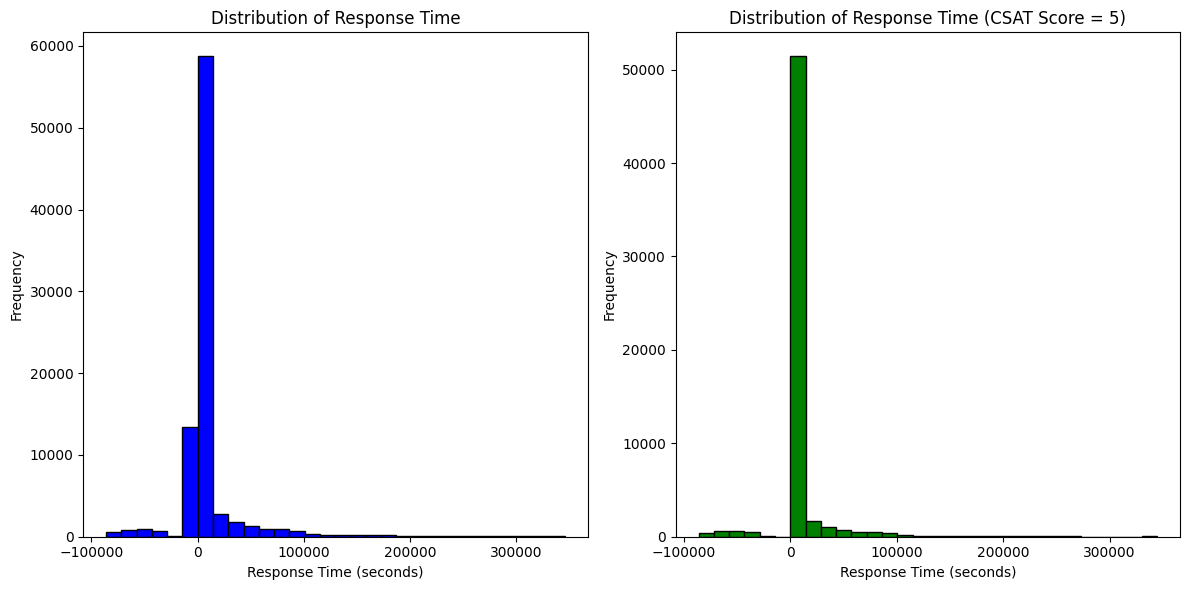

In [45]:
import matplotlib.pyplot as plt

# Visualizing the distribution of Response Time
plt.figure(figsize=(12, 6))

# Histogram for Response Time
plt.subplot(1, 2, 1)
plt.hist(df['Response_Time_seconds'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Response Time')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

# Histogram for CSAT Score when it is 5
plt.subplot(1, 2, 2)
plt.hist(df[df['CSAT Score'] == 5]['Response_Time_seconds'], bins=30, color='green', edgecolor='black')
plt.title('Distribution of Response Time (CSAT Score = 5)')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **Hypothetical Statement - 2**
When the price of an item above 5660, does it result in customer satisfaction scores to go below 3.
#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
**Null Hypothesis (H0):** The mean CSAT score for items priced above 5660 is not significantly different from 3.

**Alternative Hypothesis (H1):** The mean CSAT score for items priced above 5660 is significantly less than 3.

 **Test Type :** Use a one-sample t-test to compare the mean CSAT score of the filtered data to the value 3.



#### 2. Perform an appropriate statistical test.

In [46]:
import pandas as pd
from scipy.stats import ttest_1samp



# Step 1: Filter the Data
high_price_df = df[df['Item_price'] > 5660]

# Step 2: Perform a One-Sample t-test
# Null Hypothesis: Mean CSAT score is 3
# Alternative Hypothesis: Mean CSAT score is less than 3
t_stat, p_value = ttest_1samp(high_price_df['CSAT Score'], 3)

# Since it's a one-tailed test, we need to divide the p-value by 2
p_value /= 2

# Check if we reject the null hypothesis
significance_level = 0.05
reject_null = p_value < significance_level and t_stat < 0

# Print the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if reject_null:
    print("Reject the Null Hypothesis: The mean CSAT score for items priced above 5660 is significantly less than 3.")
else:
    print("Fail to Reject the Null Hypothesis: There is no significant evidence that the mean CSAT score for items priced above 5660 is less than 3.")


T-statistic: 18.280279867453952
P-value: 1.1786247145345673e-71
Fail to Reject the Null Hypothesis: There is no significant evidence that the mean CSAT score for items priced above 5660 is less than 3.


**Objective:** We want to compare the mean CSAT score of a subset of data (items priced above 5660) to a specific value (3).

**Type of Test:** A one-sample t-test is appropriate when you are comparing the mean of a single sample to a known or hypothesized population mean.

**Assumption:** The t-test assumes that the data is approximately normally distributed, which is a reasonable assumption for many real-world data sets, especially when the sample size is large.

**Findings Interpretation**
Fail to Reject Null Hypothesis: The p-value is greater than 0.05, it means there is not enough evidence to suggest that items priced above 5660 significantly affect customer satisfaction scores to be below 3.

**Explanation of Output**

**T-statistic:** This value indicates how many standard deviations the sample mean is away from the hypothesized mean. A negative t-statistic would support the alternative hypothesis that the sample mean is less than the hypothesized mean.

**P-value:** This value tells us the probability of obtaining a result at least as extreme as the one observed, assuming the null hypothesis is true. Since we are performing a one-tailed test, the p-value is divided by 2.

**Decision Rule:** If the p-value is less than the significance level (0.05) and the t-statistic is negative, we reject the null hypothesis, indicating that the mean CSAT score for high-priced items is significantly less than 3.

#### Which statistical test have you done to obtain P-Value?
To determine whether the price of an item above 5660 results in customer satisfaction scores below 3, I performed a one-sample t-test. Here's a detailed explanation of the choice and procedure for the test:

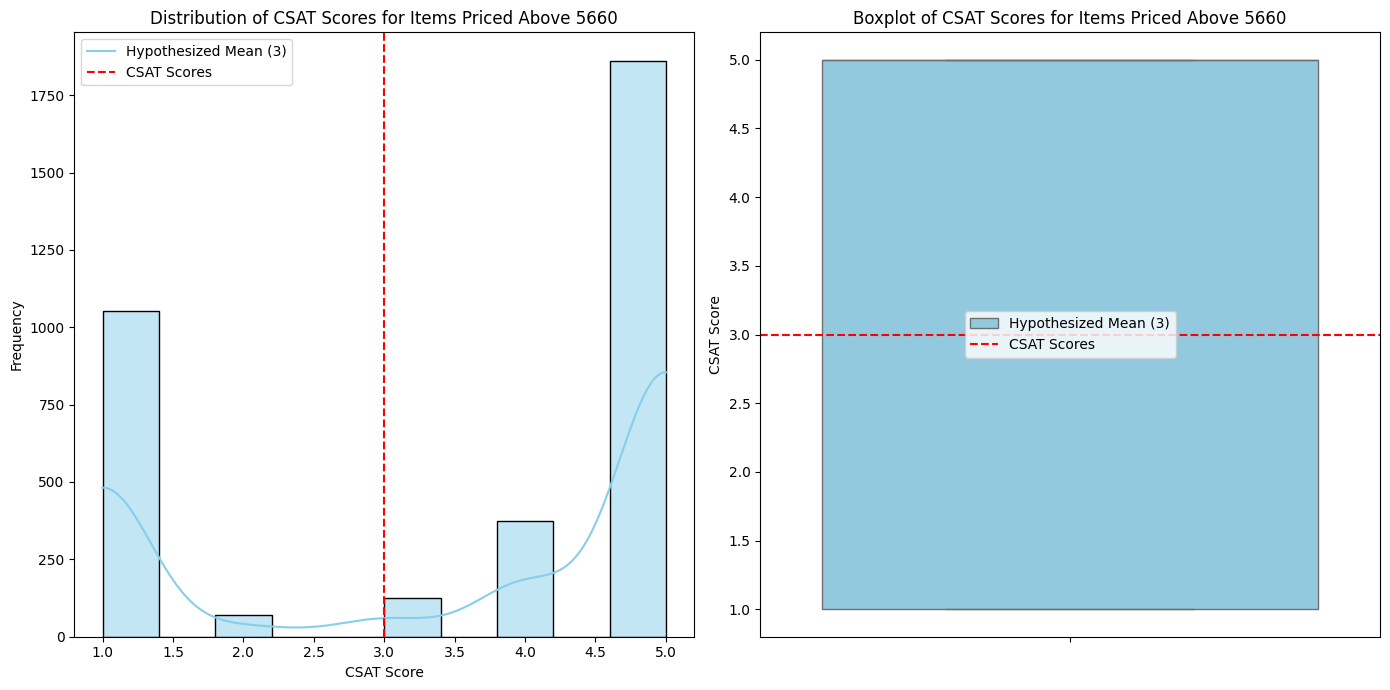

In [47]:
# Visualization
plt.figure(figsize=(14, 7))

# Histogram of CSAT Scores for high priced items
plt.subplot(1, 2, 1)
sns.histplot(high_price_df['CSAT Score'], kde=True, bins=10, color='skyblue')
plt.axvline(x=3, color='red', linestyle='--')
plt.title('Distribution of CSAT Scores for Items Priced Above 5660')
plt.xlabel('CSAT Score')
plt.ylabel('Frequency')
plt.legend(['Hypothesized Mean (3)', 'CSAT Scores'])

# Boxplot of CSAT Scores for high priced items
plt.subplot(1, 2, 2)
sns.boxplot(y=high_price_df['CSAT Score'], color='skyblue')
plt.axhline(y=3, color='red', linestyle='--')
plt.title('Boxplot of CSAT Scores for Items Priced Above 5660')
plt.ylabel('CSAT Score')
plt.legend(['Hypothesized Mean (3)', 'CSAT Scores'])

plt.tight_layout()
plt.show()

## ***5. Feature Engineering & Data Pre-processing***

In [48]:
# Creating a copy of the dataset for further feature engineering
df_new=dataset.copy()

### 1. Handling Missing Values

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64


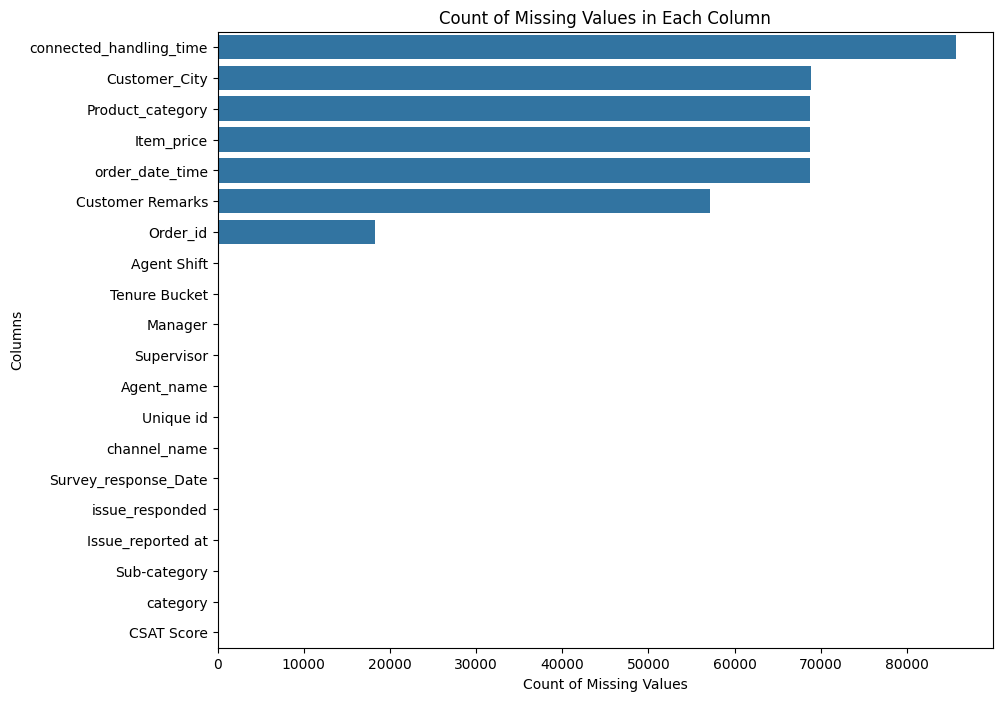

In [49]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df_new.isnull().sum())

# Visualizing the missing values

# Step 1: Calculate the count of missing values in each column and sort in descending order
missing_values = df_new.isnull().sum().sort_values(ascending=False)


# Step 2: Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=missing_values, y=missing_values.index, orient='h')
plt.xlabel('Count of Missing Values')
plt.ylabel('Columns')
plt.title('Count of Missing Values in Each Column')
plt.show()

In [50]:
# Step 1: Drop 'Order_id' column
df_new.drop(columns=['Order_id'], inplace=True)

# Step 2: Replace missing values in 'Customer Remarks' with 'Missing Reviews'
df_new['Customer Remarks'].fillna('Missing Reviews', inplace=True)

# Step 3: Impute missing values in categorical columns ('Customer city' and 'Product Category') with mode
df_new['Customer_City'].fillna(df_new['Customer_City'].mode()[0], inplace=True)
df_new['Product_category'].fillna(df_new['Product_category'].mode()[0], inplace=True)

# Step 4: Impute missing values in numerical columns ('connected_handling_time' and 'item_price')
# Impute 'connected_handling_time' with mean
df_new['connected_handling_time'].fillna(df_new['connected_handling_time'].mean(), inplace=True)
# Impute 'item_price' with median
df_new['Item_price'].fillna(df_new['Item_price'].median(), inplace=True)

# Step 5: Impute missing values in 'order_date_time' with mode
df_new['order_date_time'].fillna(df_new['order_date_time'].mode()[0], inplace=True)


# Display the first few rows of the DataFrame to verify changes
print(df_new.head())

                              Unique id channel_name         category  \
0  7e9ae164-6a8b-4521-a2d4-58f7c9fff13f      Outcall  Product Queries   
1  b07ec1b0-f376-43b6-86df-ec03da3b2e16      Outcall  Product Queries   
2  200814dd-27c7-4149-ba2b-bd3af3092880      Inbound    Order Related   
3  eb0d3e53-c1ca-42d3-8486-e42c8d622135      Inbound          Returns   
4  ba903143-1e54-406c-b969-46c52f92e5df      Inbound     Cancellation   

                   Sub-category Customer Remarks   order_date_time  \
0                Life Insurance  Missing Reviews  09/08/2023 11:55   
1  Product Specific Information  Missing Reviews  09/08/2023 11:55   
2             Installation/demo  Missing Reviews  09/08/2023 11:55   
3        Reverse Pickup Enquiry  Missing Reviews  09/08/2023 11:55   
4                    Not Needed  Missing Reviews  09/08/2023 11:55   

  Issue_reported at   issue_responded Survey_response_Date Customer_City  \
0  01/08/2023 11:13  01/08/2023 11:47            01-Aug-23     H

In [51]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df_new.isnull().sum())

# Visualizing the missing values

# Step 1: Calculate the count of missing values in each column and sort in descending order
missing_values = df_new.isnull().sum().sort_values(ascending=False)


Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Customer_City              0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
dtype: int64


### 2. Handling Outliers

In [52]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
df_new["CSAT Score"]=df_new["CSAT Score"].astype('str')
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_new.describe().columns:
  if abs(df_new[i].mean()-df_new[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)




Symmetric Distributed Features : - ['connected_handling_time']
Skew Symmetric Distributed Features : - ['Item_price']


In [53]:
# For Skew Symmetric features defining upper and lower boundry
def outlier_treatment(df,feature):
  upper_boundary= df[feature].mean()+3*df[feature].std()
  lower_boundary= df[feature].mean()-3*df[feature].std()
  return upper_boundary,lower_boundary

In [54]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
  df_new.loc[df_new[feature]<= outlier_treatment(df=df_new,feature=feature)[1], feature]=outlier_treatment(df=df_new,feature=feature)[1]
  df_new.loc[df_new[feature]>= outlier_treatment(df=df_new,feature=feature)[0], feature]=outlier_treatment(df=df_new,feature=feature)[0]

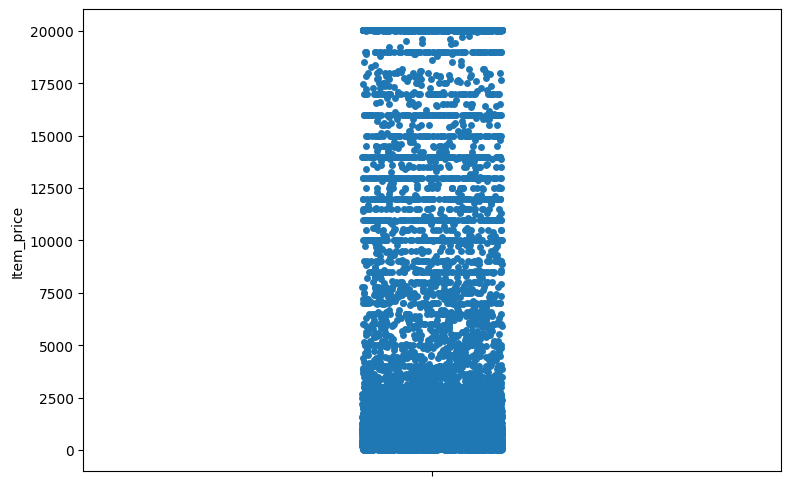

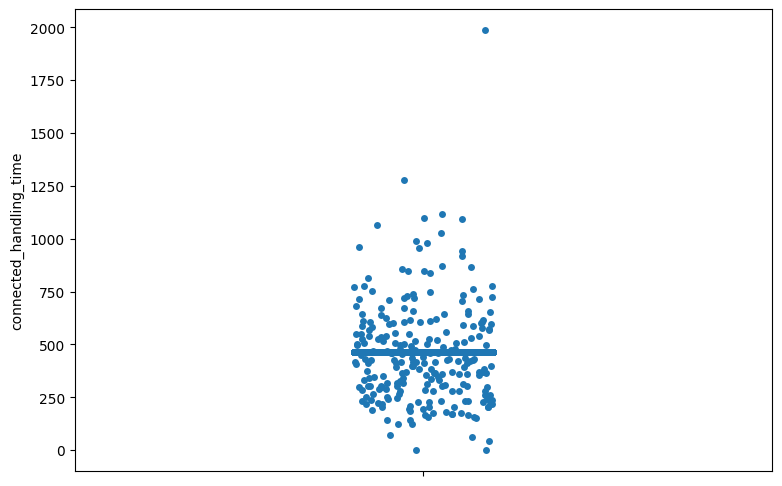

In [55]:
# After Outlier Treatment showing the dataset distribution using strip plot
# Visualising  code for the numerical columns
for col in df_new.describe().columns:
  fig=plt.figure(figsize=(9,6))
  sns.stripplot(df_new[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?
First I changed the CSAT Score column to sring as it shouldn't be treated as numerical column as there are only five type of values and should be treated as categorical column. Then I separated the skew symmetric and symmetric features and define the upper and lower boundry as defined below. Again, as it is a classification problem I restrict the both boundaries and I pull down the higher value restricted to the upper limit



### 3. Categorical Encoding

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         85907 non-null  object 
 5   order_date_time          85907 non-null  object 
 6   Issue_reported at        85907 non-null  object 
 7   issue_responded          85907 non-null  object 
 8   Survey_response_Date     85907 non-null  object 
 9   Customer_City            85907 non-null  object 
 10  Product_category         85907 non-null  object 
 11  Item_price               85907 non-null  float64
 12  connected_handling_time  85907 non-null  float64
 13  Agent_name               85907 non-null  object 
 14  Supervisor            

In [57]:
df_new.drop(columns='Unique id', inplace=True)


In [58]:

# Encode your categorical columns
# Getting the categorical columns
df_new["CSAT Score"]=df_new["CSAT Score"].astype('int')
categorical_columns=list(set(df_new.columns.to_list()).difference(set(df_new.describe().columns.to_list())))
non_cat_columns=['issue_responded','order_date_time','Issue_reported at','Survey_response_Date','Customer Remarks']
categorical_columns = list(set(categorical_columns) - set(non_cat_columns))
print("Categorical Columns are :-", categorical_columns, " :- ", len(categorical_columns))

Categorical Columns are :- ['channel_name', 'Agent_name', 'Supervisor', 'category', 'Product_category', 'Sub-category', 'Customer_City', 'Agent Shift', 'Manager', 'Tenure Bucket']  :-  10


In [59]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df_new, columns=categorical_columns)

# Display the encoded DataFrame
df_encoded.head()

,Customer Remarks,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Item_price,connected_handling_time,CSAT Score,channel_name_Email,channel_name_Inbound,...,Manager_Jennifer Nguyen,Manager_John Smith,Manager_Michael Lee,Manager_Olivia Tan,Manager_William Kim,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training
0,Missing Reviews,09/08/2023 11:55,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,979.0,462.400826,5,False,False,...,True,False,False,False,False,False,False,False,False,True
1,Missing Reviews,09/08/2023 11:55,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,979.0,462.400826,5,False,False,...,False,False,True,False,False,False,False,False,True,False
2,Missing Reviews,09/08/2023 11:55,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,979.0,462.400826,5,False,True,...,False,False,False,False,True,False,False,False,False,True
3,Missing Reviews,09/08/2023 11:55,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,979.0,462.400826,5,False,True,...,False,True,False,False,False,False,False,False,True,False
4,Missing Reviews,09/08/2023 11:55,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,979.0,462.400826,5,False,True,...,False,False,True,False,False,True,False,False,False,False


#### What all categorical encoding techniques have you used & why did you use those techniques?
I have used One Hot Encoding for all the categorical features,because these features are likely nominal categorical variables, meaning there is no inherent order or ranking among the categories. For these variables, it would be appropriate to apply one-hot encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation
Created Some new features like Response_Time_seconds,day_number_order_date,weekday_number_order_date,weekday_num_response_date and day_num_response_date

In [60]:
# Manipulate Features to minimize feature correlation and create new features
# Ensure the 'Issue reported at' and 'Issue responded' columns are in datetime format
df_encoded['Issue_reported at'] = pd.to_datetime(df_encoded['Issue_reported at'], format='%d/%m/%Y %H:%M')
df_encoded['issue_responded'] = pd.to_datetime(df_encoded['issue_responded'], format='%d/%m/%Y %H:%M')


# Create a new feature the response time
df_encoded['Response_Time'] = df_encoded['issue_responded'] - df_encoded['Issue_reported at']

# Convert 'Response_Time' to a numerical format in seconds for aggregation
df_encoded['Response_Time_seconds'] = df_encoded['Response_Time'].dt.total_seconds()

In [61]:
# Convert order_date_time to datetime
df_encoded['order_date_time'] = pd.to_datetime(df_encoded['order_date_time'], format='%d/%m/%Y %H:%M')

# Extract day number (day of the month)
df_encoded['day_number_order_date'] = df_encoded['order_date_time'].dt.day

# Extract weekday (numerical value: 0 for Sunday, 1 for Monday, etc.)
df_encoded['weekday_num_order_date'] = df_encoded['order_date_time'].dt.weekday + 1  # Monday=1, Sunday=7


# Convert 'Survey_response_Date' to datetime format
df_encoded['Survey_response_Date'] = pd.to_datetime(df_encoded['Survey_response_Date'], format='%d-%b-%y')

# Extract day number (day of the month)
df_encoded['day_number_response_date'] = df_encoded['Survey_response_Date'].dt.day

# Extract weekday (numerical value: 0 for Sunday, 1 for Monday, etc.)
df_encoded['weekday_num_response_date'] = df_encoded['Survey_response_Date'].dt.weekday + 1


In [62]:
# Drop Date columns after feature extraction
df_encoded.drop(columns=['order_date_time', 'Survey_response_Date','Issue_reported at','issue_responded','Response_Time'], inplace=True)

In [63]:
df_encoded.head()

,Customer Remarks,Item_price,connected_handling_time,CSAT Score,channel_name_Email,channel_name_Inbound,channel_name_Outcall,Agent_name_Aaron Edwards,Agent_name_Aaron Romero,Agent_name_Abigail Gonzalez,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Response_Time_seconds,day_number_order_date,weekday_num_order_date,day_number_response_date,weekday_num_response_date
0,Missing Reviews,979.0,462.400826,5,False,False,True,False,False,False,...,False,False,False,False,True,2040.0,9,3,1,2
1,Missing Reviews,979.0,462.400826,5,False,False,True,False,False,False,...,False,False,False,True,False,120.0,9,3,1,2
2,Missing Reviews,979.0,462.400826,5,False,True,False,False,False,False,...,False,False,False,False,True,1320.0,9,3,1,2
3,Missing Reviews,979.0,462.400826,5,False,True,False,False,False,False,...,False,False,False,True,False,1200.0,9,3,1,2
4,Missing Reviews,979.0,462.400826,5,False,True,False,False,False,False,...,True,False,False,False,False,120.0,9,3,1,2


### 2. Feature Selection

In [64]:
# Checking the shape of dataset
df_encoded.shape

(85907, 3299)

In [65]:
# Dropping Constant and Quasi Constant Feature
def dropping_constant(data):
    from sklearn.feature_selection import VarianceThreshold

    # Drop non-numeric columns
    numeric_data = data.select_dtypes(include=['number'])

    var_thres = VarianceThreshold(threshold=0.05)
    var_thres.fit(numeric_data)

    concol = [column for column in numeric_data.columns
              if column not in numeric_data.columns[var_thres.get_support()]]

    if "CSAT Score" in concol:
        concol.remove("CSAT Score")

    df_removed_var = data.drop(concol, axis=1)
    return df_removed_var

In [66]:
# Calling the function
df_removed_var=dropping_constant(df_encoded)

In [67]:
# Checking the shape after feature dropped
df_removed_var.shape

(85907, 3299)

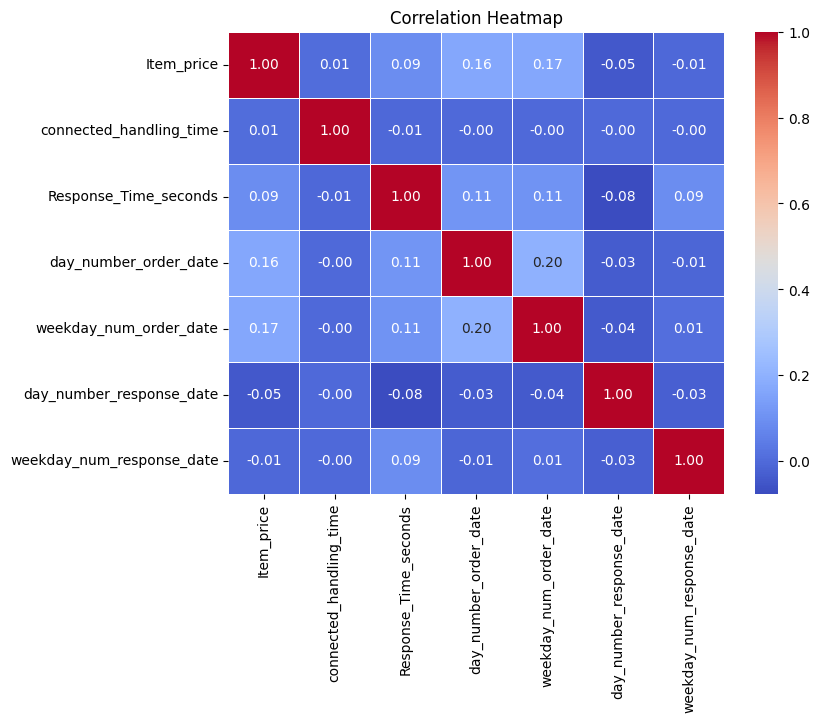

In [68]:
# Correlation Heatmap visualization code
# Drop non-numeric columns
numeric_data = df_removed_var.select_dtypes(include=['number'])
numeric_data.drop(columns=['CSAT Score'], inplace=True)
corr = numeric_data.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)



# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [69]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
    return vif_data

# Assuming df is your DataFrame containing the features
vif_results = calculate_vif(df)
print(vif_results)


                     Feature        VIF
0                 Item_price   1.329280
1    connected_handling_time  22.090568
2      Response_Time_seconds   1.093413
3      day_number_order_date   6.462011
4     weekday_num_order_date  12.258805
5   day_number_response_date   4.487835
6  weekday_num_response_date   4.913423


In [70]:
# Drop highly correlated feature
df_removed_var.drop(columns=['weekday_num_order_date'], inplace=True)

In [71]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
  col_corr=set()
  corr_matrix= df.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)



In [72]:
# Getting multicolinear columns and dropping them
numeric_data = df_removed_var.select_dtypes(include=['number'])
numeric_data.drop(columns=['CSAT Score'], inplace=True)
highly_correlated_columns=correlation(numeric_data,0.5)

if "CSAT Score" in highly_correlated_columns:
  highly_correlated_columns.remove("CSAT Score")
else:
  pass

df_removed=df_removed_var.drop(highly_correlated_columns,axis=1)
df_removed.shape

(85907, 3298)

In [73]:
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
    return vif_data

# Assuming df is your DataFrame containing the features
vif_results = calculate_vif(df)
print(vif_results)

                     Feature        VIF
0                 Item_price   1.306889
1    connected_handling_time  13.904575
2      Response_Time_seconds   1.087071
3      day_number_order_date   6.261296
4   day_number_response_date   4.486682
5  weekday_num_response_date   4.913003


In [74]:
# After Feature Selection checking the shape left with
df_removed.shape


(85907, 3298)

In [75]:
df_removed.isnull().sum()

Customer Remarks                 0
Item_price                       0
connected_handling_time          0
CSAT Score                       0
channel_name_Email               0
                                ..
Tenure Bucket_On Job Training    0
Response_Time_seconds            0
day_number_order_date            0
day_number_response_date         0
weekday_num_response_date        0
Length: 3298, dtype: int64

##### What all feature selection methods have you used  and why?
I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF.

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8. The features got decreased from 77 to 10.

### 5. Data Transformation

In [76]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.25:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.remove('CSAT Score')

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['connected_handling_time', 'weekday_num_response_date']
Skew Symmetric Distributed Features : - ['Item_price', 'Response_Time_seconds', 'day_number_order_date', 'day_number_response_date']


#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?
From the features, I got to know that there are 2 features which aren't symmetric so aren't following gaussian distribution and rest are having szymmetric curve. Thus, for those two columns I have used Exponential transformation to achieve gaussian distribution.

 I tried with other transformations and found exponetial tranformation with no infinity value and working fine. So, I am continuing with Exponentia lransformation with a power of 0.25.


**First Transformation**

In [77]:
# Transform Your data
# Exponential Transforming the required column
df_removed['Item_price']=np.sqrt(df_removed['Item_price'])
df_removed['Response_Time_seconds']=np.sqrt(df_removed['Response_Time_seconds'])
df_removed['day_number_order_date']=(df_removed['day_number_order_date'])**0.25
df_removed['day_number_response_date']=(df_removed['day_number_response_date'])**0.25


In [78]:
df_removed.isnull().sum()

Customer Remarks                    0
Item_price                          0
connected_handling_time             0
CSAT Score                          0
channel_name_Email                  0
                                 ... 
Tenure Bucket_On Job Training       0
Response_Time_seconds            3128
day_number_order_date               0
day_number_response_date            0
weekday_num_response_date           0
Length: 3298, dtype: int64

In [79]:
#Fill NaN values with the median of Response_Time_seconds columns
df_removed['Response_Time_seconds'] = df_removed['Response_Time_seconds'].fillna(df_removed['Response_Time_seconds'].median())


In [80]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.25:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.remove('CSAT Score')

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['connected_handling_time', 'day_number_order_date', 'day_number_response_date', 'weekday_num_response_date']
Skew Symmetric Distributed Features : - ['Item_price', 'Response_Time_seconds']


**Second Transformation**

In [81]:
df_removed['Response_Time_seconds'] = np.sqrt(df_removed['Response_Time_seconds'])
df_removed['Item_price'] = (df_removed['Item_price'])**0.25

In [82]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.25:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.remove('CSAT Score')

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Item_price', 'connected_handling_time', 'day_number_order_date', 'day_number_response_date', 'weekday_num_response_date']
Skew Symmetric Distributed Features : - ['Response_Time_seconds']


**Third Transformation**

In [83]:
# Perform sqrt transform on 'Response_Time_seconds' column
df_removed['Response_Time_seconds'] = np.sqrt(df_removed['Response_Time_seconds'])

In [84]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in df_removed.describe().columns:
  if abs(df_removed[i].mean()-df_removed[i].median())<0.25:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.remove('CSAT Score')

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Item_price', 'connected_handling_time', 'Response_Time_seconds', 'day_number_order_date', 'day_number_response_date', 'weekday_num_response_date']
Skew Symmetric Distributed Features : - []


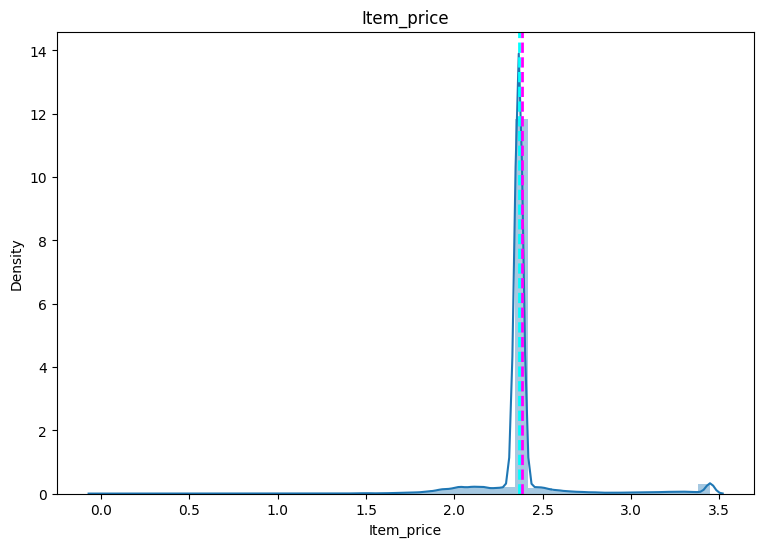

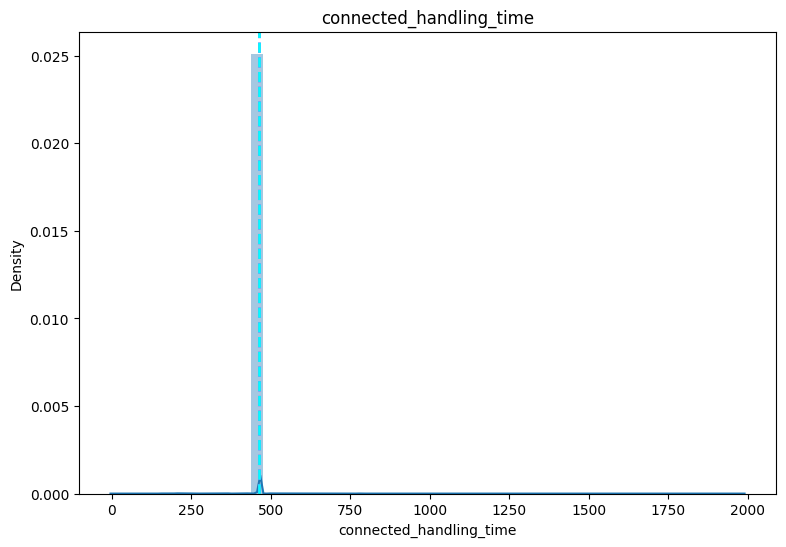

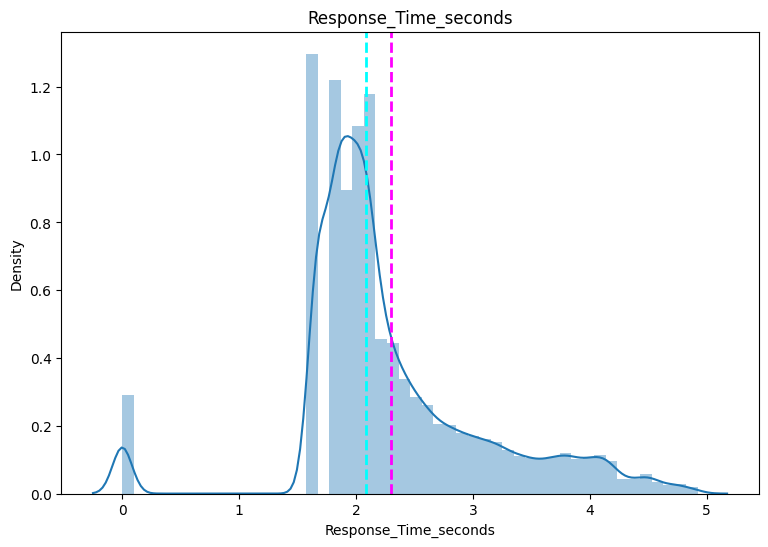

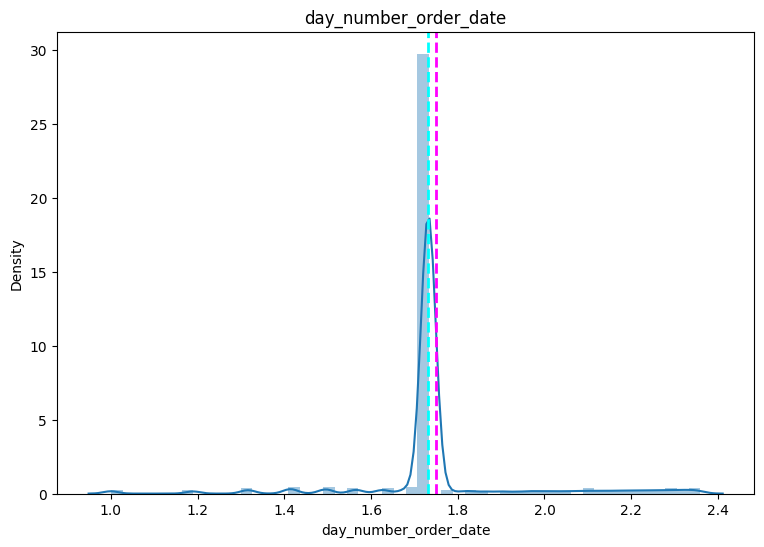

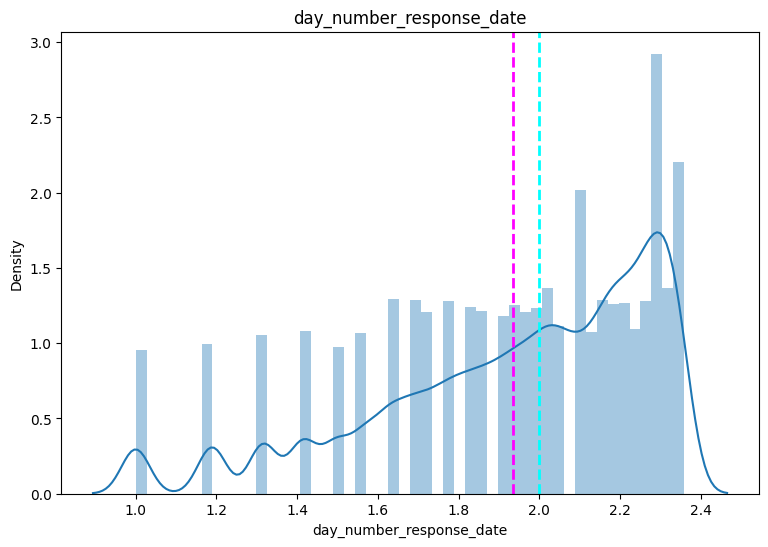

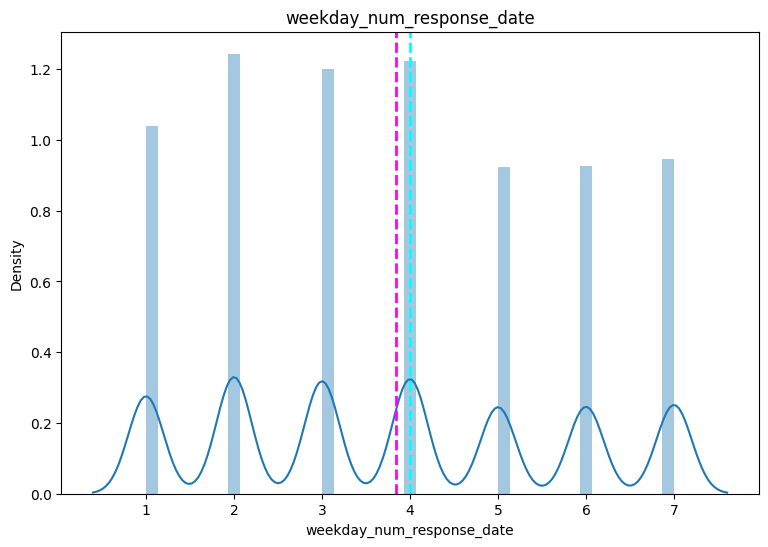

In [85]:
# Visualizing code of hist plot for each columns to know the data distibution
for col in df_removed.loc[:,symmetric_feature]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df_removed[col])
  sns.distplot(df_removed[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

### 6. Data Scaling
When you are using an algorithm that assumes your features have a similar range, you should use feature scaling.

If the ranges of your features differ much then you should use feature scaling. If the range does not vary a lot like one of them is between 0 and 2 and the other one is between -1 and 0.5 then you can leave them as it's. However, you should use feature scaling if the ranges are, for example, between -2 and 2 and between -100 and 100.

Use Standardization when your data follows Gaussian distribution.
Use Normalization when your data does not follow Gaussian distribution.

So, in my dataset we are having large data difference and following gaussian distribution. That's why, I have used standardization using Standardscaler.


In [86]:
# Scaling your data
# Checking the data
df_removed.head()

,Customer Remarks,Item_price,connected_handling_time,CSAT Score,channel_name_Email,channel_name_Inbound,channel_name_Outcall,Agent_name_Aaron Edwards,Agent_name_Aaron Romero,Agent_name_Abigail Gonzalez,...,Manager_William Kim,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Response_Time_seconds,day_number_order_date,day_number_response_date,weekday_num_response_date
0,Missing Reviews,2.365091,462.400826,5,False,False,True,False,False,False,...,False,False,False,False,False,True,2.592410,1.732051,1.0,2
1,Missing Reviews,2.365091,462.400826,5,False,False,True,False,False,False,...,False,False,False,False,True,False,1.819272,1.732051,1.0,2
2,Missing Reviews,2.365091,462.400826,5,False,True,False,False,False,False,...,True,False,False,False,False,True,2.455114,1.732051,1.0,2
3,Missing Reviews,2.365091,462.400826,5,False,True,False,False,False,False,...,False,False,False,False,True,False,2.426038,1.732051,1.0,2
4,Missing Reviews,2.365091,462.400826,5,False,True,False,False,False,False,...,False,True,False,False,False,False,1.819272,1.732051,1.0,2


##### Which method have you used to scale you data and why?

In [87]:
final_df=df_removed.copy()

In [88]:
y=df_removed['CSAT Score']

In [89]:
df_removed.drop(columns=['CSAT Score'],inplace=True)

In [90]:
df_removed.head()

,Customer Remarks,Item_price,connected_handling_time,channel_name_Email,channel_name_Inbound,channel_name_Outcall,Agent_name_Aaron Edwards,Agent_name_Aaron Romero,Agent_name_Abigail Gonzalez,Agent_name_Adam Barnett,...,Manager_William Kim,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Response_Time_seconds,day_number_order_date,day_number_response_date,weekday_num_response_date
0,Missing Reviews,2.365091,462.400826,False,False,True,False,False,False,False,...,False,False,False,False,False,True,2.592410,1.732051,1.0,2
1,Missing Reviews,2.365091,462.400826,False,False,True,False,False,False,False,...,False,False,False,False,True,False,1.819272,1.732051,1.0,2
2,Missing Reviews,2.365091,462.400826,False,True,False,False,False,False,False,...,True,False,False,False,False,True,2.455114,1.732051,1.0,2
3,Missing Reviews,2.365091,462.400826,False,True,False,False,False,False,False,...,False,False,False,False,True,False,2.426038,1.732051,1.0,2
4,Missing Reviews,2.365091,462.400826,False,True,False,False,False,False,False,...,False,True,False,False,False,False,1.819272,1.732051,1.0,2


In [91]:
import joblib
from sklearn.preprocessing import StandardScaler

# Select only the numerical columns from df_removed
numerical_columns = df_removed.select_dtypes(include=['number']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
df_removed[numerical_columns] = scaler.fit_transform(df_removed[numerical_columns])

# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

# Display the scaled DataFrame
df_removed.head()



,Customer Remarks,Item_price,connected_handling_time,channel_name_Email,channel_name_Inbound,channel_name_Outcall,Agent_name_Aaron Edwards,Agent_name_Aaron Romero,Agent_name_Abigail Gonzalez,Agent_name_Adam Barnett,...,Manager_William Kim,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Response_Time_seconds,day_number_order_date,day_number_response_date,weekday_num_response_date
0,Missing Reviews,-0.09226,0.0,False,False,True,False,False,False,False,...,False,False,False,False,False,True,0.363236,-0.106597,-2.735145,-0.94492
1,Missing Reviews,-0.09226,0.0,False,False,True,False,False,False,False,...,False,False,False,False,True,False,-0.590667,-0.106597,-2.735145,-0.94492
2,Missing Reviews,-0.09226,0.0,False,True,False,False,False,False,False,...,True,False,False,False,False,True,0.193840,-0.106597,-2.735145,-0.94492
3,Missing Reviews,-0.09226,0.0,False,True,False,False,False,False,False,...,False,False,False,False,True,False,0.157965,-0.106597,-2.735145,-0.94492
4,Missing Reviews,-0.09226,0.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,-0.590667,-0.106597,-2.735145,-0.94492


In [92]:
numerical_columns

Index(['Item_price', 'connected_handling_time', 'Response_Time_seconds',
       'day_number_order_date', 'day_number_response_date',
       'weekday_num_response_date'],
      dtype='object')

In [93]:
# Save the fitted scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [94]:
df_removed.isnull().sum()

Customer Remarks                 0
Item_price                       0
connected_handling_time          0
channel_name_Email               0
channel_name_Inbound             0
                                ..
Tenure Bucket_On Job Training    0
Response_Time_seconds            0
day_number_order_date            0
day_number_response_date         0
weekday_num_response_date        0
Length: 3297, dtype: int64

In [112]:
print(df_removed.shape)  # Should be (85907, 3296), NOT (85907, 3297)
print(df_removed.columns)  # Check if there's an extra unexpected column


(85907, 3297)
Index(['Customer Remarks', 'Item_price', 'connected_handling_time',
       'channel_name_Email', 'channel_name_Inbound', 'channel_name_Outcall',
       'Agent_name_Aaron Edwards', 'Agent_name_Aaron Romero',
       'Agent_name_Abigail Gonzalez', 'Agent_name_Adam Barnett',
       ...
       'Manager_William Kim', 'Tenure Bucket_0-30', 'Tenure Bucket_31-60',
       'Tenure Bucket_61-90', 'Tenure Bucket_>90',
       'Tenure Bucket_On Job Training', 'Response_Time_seconds',
       'day_number_order_date', 'day_number_response_date',
       'weekday_num_response_date'],
      dtype='object', length=3297)


In [113]:
print(df_removed.select_dtypes(include=['object']).columns)


Index(['Customer Remarks'], dtype='object')


In [114]:
df_removed = df_removed.drop(columns=['Customer Remarks'])  # Replace 'ColumnName' with the actual name


### 7. Data Splitting

In [115]:
#One Hot Encoding of Target Variable

from sklearn.preprocessing import OneHotEncoder

# Extract the target variable
y = final_df['CSAT Score'].values.reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the target variable
y_one_hot = encoder.fit_transform(y)

# Convert to pandas DataFrame
y_one_hot_df = pd.DataFrame(y_one_hot, columns=[f'class_{int(i)}' for i in range(y_one_hot.shape[1])])


In [116]:
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 70:30 ratio
    
X_train, X_test, y_train, y_test = train_test_split(df_removed,y_one_hot_df, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (60134, 3296)
Number transactions y_train dataset:  (60134, 5)
Number transactions X_test dataset:  (25773, 3296)
Number transactions y_test dataset:  (25773, 5)


In [117]:
features_list=X_train.columns.to_list()
import joblib
# Save the fitted scaler
joblib.dump(features_list, "features.pkl")

['features.pkl']

##### What data splitting ratio have you used and why?
There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

### 8. Handling Imbalanced Dataset


class_0  class_1  class_2  class_3  class_4
0.0      0.0      0.0      0.0      1.0        41806
1.0      0.0      0.0      0.0      0.0         7840
0.0      0.0      0.0      1.0      0.0         7810
                  1.0      0.0      0.0         1801
         1.0      0.0      0.0      0.0          877
Name: count, dtype: int64
 


<Axes: ylabel='count'>

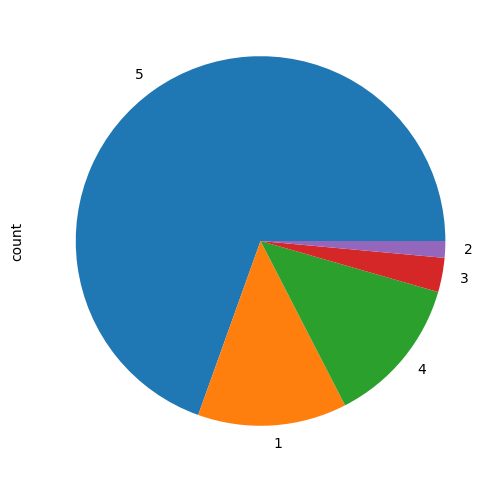

In [118]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(y_train.value_counts())
print(" ")
# Dependant Variable Column Visualization
y_train.value_counts().plot(kind='pie',
                              figsize=(15,6),
                               labels=['5','1','4','3','2']


                              )

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 85:15. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [121]:
# Handling Imbalance in the Target Variable using S.M.O.T.E

# Convert the one-hot encoded DataFrame back to a Series of original class labels to apply SMOTE
y_series = y_train.idxmax(axis=1).apply(lambda x: int(x.split('_')[1]))

from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
sm = SMOTE(random_state=42)

# Resample the training data using SMOTE
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_series)

# Describe info about train and test set
print("Number of transactions in X_train dataset: ", X_train_resampled.shape)
print("Number of transactions in y_train dataset: ", y_train_resampled.shape)
print("Number of transactions in X_test dataset: ", X_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)

Number of transactions in X_train dataset:  (209030, 3296)
Number of transactions in y_train dataset:  (209030,)
Number of transactions in X_test dataset:  (25773, 3296)
Number of transactions in y_test dataset:  (25773, 5)


In [122]:
#Converting the target variable train data shape that of test data shape

# Extract the target variable
y = y_train_resampled.values.reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the target variable
y_one_hot = encoder.fit_transform(y)

# Convert y_train_resampled_one_hot back to DataFrame for consistency
y_train_resampled_df = pd.DataFrame(y_one_hot, columns=[f'class_{int(i)}' for i in range(y_one_hot.shape[1])])

class_0  class_1  class_2  class_3  class_4
0.0      0.0      0.0      0.0      1.0        41806
                           1.0      0.0        41806
                  1.0      0.0      0.0        41806
         1.0      0.0      0.0      0.0        41806
1.0      0.0      0.0      0.0      0.0        41806
Name: count, dtype: int64
 


<Axes: ylabel='count'>

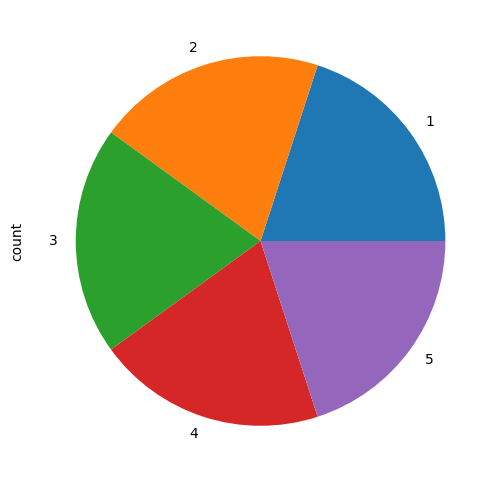

In [123]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(y_train_resampled_df.value_counts())
print(" ")
# Dependant Variable Column Visualization
y_train_resampled_df.value_counts().plot(kind='pie',
                              figsize=(15,6),
                               labels=['1','2','3','4','5']


                              )

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)
I have used SMOTE (Synthetic Minority Over-sampling technique) for balanced the 85:15 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method.

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm.

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.


In [124]:
# Describe info about train and test set
print("Number of transactions in X_train dataset: ", X_train_resampled.shape)
print("Number of transactions in y_train dataset: ", y_train_resampled_df.shape)
print("Number of transactions in X_test dataset: ", X_test.shape)
print("Number of transactions in y_test dataset: ", y_test.shape)

Number of transactions in X_train dataset:  (209030, 3296)
Number of transactions in y_train dataset:  (209030, 5)
Number of transactions in X_test dataset:  (25773, 3296)
Number of transactions in y_test dataset:  (25773, 5)


## ***7. ML Model Implementation***

### DL Model - 1 - **Deep Learning ANN Classification Model**

### **Step 1: Install Required Libraries**

In [125]:
import tensorflow as tf
print(tf.__version__)


2.15.0


### **Step 2: Import Libraries**

In [126]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt

In [127]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from keras.callbacks import EarlyStopping
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt


### **Step 3: Ensuring the target labels  in the correct format.**

In [128]:
# Ensure target labels are numerical and feature arrays are float
y_train_numerical = y_train_resampled_df.astype(int)
y_test_numerical = y_test.astype(int)

# Convert DataFrame to numpy array and ensure float32 type
X_train_array = X_train_resampled.values.astype(np.float32)
X_test_array = X_test.values.astype(np.float32)

# Ensure target labels are numpy arrays
y_train_array = np.array(y_train_numerical)
y_test_array = np.array(y_test_numerical)


In [129]:
# Get input dimensions
input_dim = X_train.shape[1]
num_classes = len(np.unique(y))
input_dim ,num_classes

(3296, 5)

 **Adding Learning Rate Scheduler**
 
First, you need to define a learning rate scheduler function:

### **Step 4: Define the ANN Model**

In [130]:
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [131]:
from tensorflow import keras
from tensorflow.keras import models

# Dropout rate
dropout_rate = 0.5

# Define the neural network model with BatchNormalization and Dropout layers
neural_classifier = Sequential(
    [
        Dense(128, activation="relu", kernel_regularizer=l2(),input_dim=X_train.shape[1]),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(96, activation="relu", kernel_regularizer=l2()),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(64, activation="relu", kernel_regularizer=l2()),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(32, activation="relu", kernel_regularizer=l2()),
        BatchNormalization(),
        Dropout(dropout_rate),
        
        Dense(num_classes, activation="softmax")
    ]
)

# Print the model summary
neural_classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               422016    
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 96)                12384     
                                                                 
 batch_normalization_1 (Bat  (None, 96)                384       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 96)                

### **Step 5: Define and Initialize the Keras Classifier model**


In [ ]:
# Initialize Model

scikeras_classifier = KerasClassifier(model=neural_classifier,
                                    optimizer="adam",
                                    loss=keras.losses.categorical_crossentropy,
                                    batch_size=4000,
                                    epochs=30,
                                    metrics=['accuracy'],
                                    random_state=42,
                                    warm_start=True
                          )

### **Step 6: Initialize StratifiedKFold Cross Validation (no. of folds=3)**

In [135]:
# Define number of folds
n_folds = 3

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)


### **Step 7: Performing 3-fold cross validation and training the ANN deep learning model**

In [136]:
# Lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

# Lists to store train and test accuracies for visualization
history_list = []

# Perform 3-fold cross-validation
for train_index, test_index in skf.split(X_train_array, np.argmax(y_train_array, axis=1)):
    X_train_fold, X_test_fold = X_train_array[train_index], X_train_array[test_index]
    y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]
    
    # Define EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    # Define LearningRateScheduler callback
    lr_scheduler = LearningRateScheduler(scheduler)
    
    # Fit the model with early stopping and learning rate scheduler
    scikeras_classifier.fit(X_train_fold, y_train_fold, 
              validation_data=(X_test_fold, y_test_fold), 
              callbacks=[early_stopping, lr_scheduler], 
              verbose=1)
    
    # Append the history for visualization later
    history_list.append(scikeras_classifier.history_)
    
    # Evaluate the model on train data
    train_accuracy = scikeras_classifier.score(X_train_fold, y_train_fold)
    train_accuracies.append(train_accuracy)
    
    # Evaluate the model on test data
    test_accuracy = scikeras_classifier.score(X_test_fold, y_test_fold)
    test_accuracies.append(test_accuracy)
    
    # Train metric
    y_pred_tr = scikeras_classifier.predict(X_train_fold)
    y_pred_classes_tr = np.argmax(y_pred_tr, axis=1)
    y_test_classes_tr = np.argmax(y_train_fold, axis=1)
    
    # Test Metric
    y_pred = scikeras_classifier.predict(X_test_fold)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test_fold, axis=1)
    
    print("Train Accuracy:", accuracy_score(y_test_classes_tr, y_pred_classes_tr))
    print("Test Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
    print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes))


Epoch 1/30


35/35 [==============================] - 11s 150ms/step - loss: 5.4578 - accuracy: 0.2157 - val_loss: 3.9932 - val_accuracy: 0.1999
Epoch 2/30
35/35 [==============================] - 3s 89ms/step - loss: 3.7418 - accuracy: 0.2291 - val_loss: 3.2030 - val_accuracy: 0.2002
Epoch 3/30
35/35 [==============================] - 3s 81ms/step - loss: 2.9887 - accuracy: 0.2541 - val_loss: 2.7108 - val_accuracy: 0.2000
Epoch 4/30
35/35 [==============================] - 3s 78ms/step - loss: 2.4905 - accuracy: 0.3156 - val_loss: 2.3714 - val_accuracy: 0.2098
Epoch 5/30
35/35 [==============================] - 3s 81ms/step - loss: 2.0438 - accuracy: 0.4176 - val_loss: 2.1465 - val_accuracy: 0.2251
Epoch 6/30
35/35 [==============================] - 3s 80ms/step - loss: 1.7552 - accuracy: 0.4734 - val_loss: 2.0310 - val_accuracy: 0.2794
Epoch 7/30
35/35 [==============================] - 3s 79ms/step - loss: 1.5298 - accuracy: 0.5243 - val_loss: 2.0248 - val_accuracy: 0.2302
Epoch 8/

In [137]:
# Calculate mean train and test accuracies
mean_train_accuracy = np.mean(train_accuracies)
mean_test_accuracy = np.mean(test_accuracies)

# Evaluation Metrics
print("Mean Train Accuracy:", mean_train_accuracy)
print("Mean Test Accuracy:", mean_test_accuracy)

Mean Train Accuracy: 0.8609314293049692
Mean Test Accuracy: 0.8388174215856071


### **Step 8: Visualization the performance of ANN deep learning model**
Analyze the model's predictions to identify trends, patterns, and areas for service improvement.


#### **ROC AUC Curve**

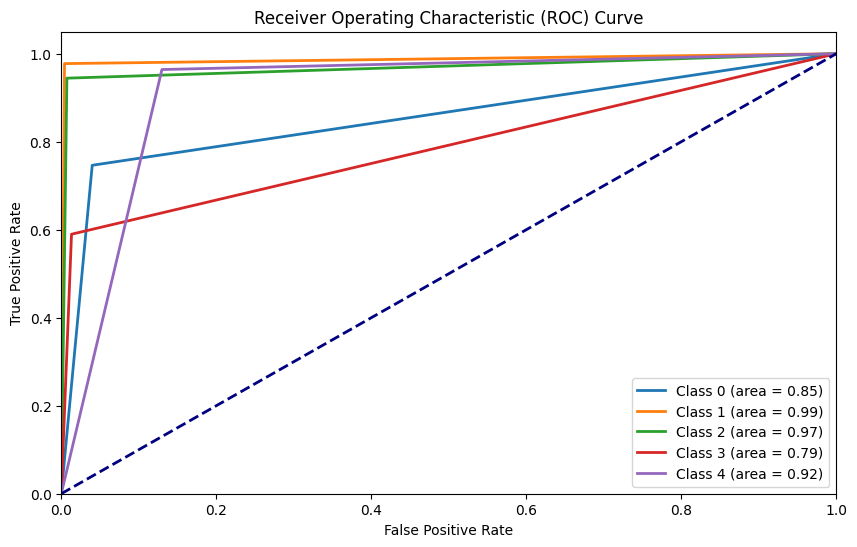

In [147]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

def plot_roc_curve(y_test, y_pred, num_classes):
    plt.figure(figsize=(10, 6))
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label='Class %d (area = %0.2f)' % (i, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Assuming `y_test_classes` and `y_pred` are the one-hot encoded true and predicted labels
plot_roc_curve(y_test_fold, y_pred, num_classes)


#### **Confusion Matrix**

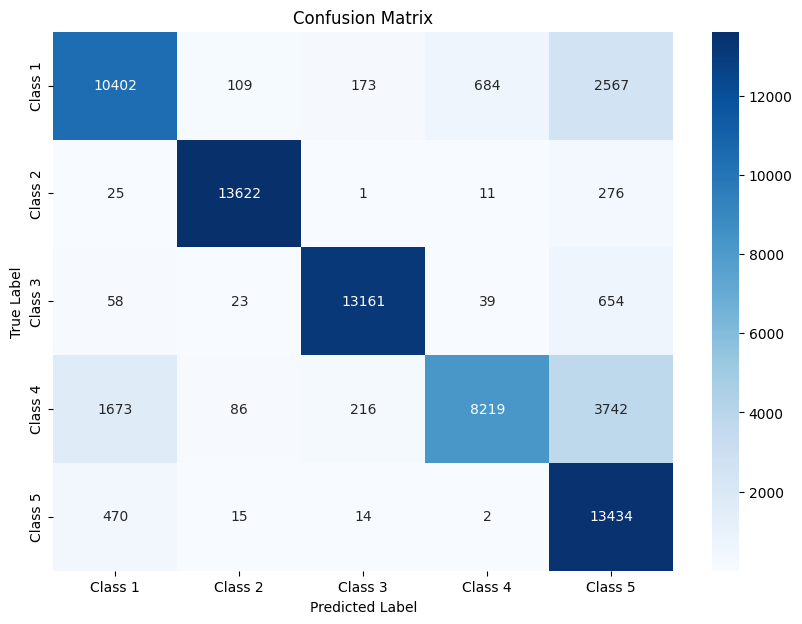

In [146]:
def plot_confusion_matrix(y_test, y_pred_classes, class_names):
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming `y_test_classes` and `y_pred_classes` are the true and predicted labels
class_names = ['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']  # Replace with your actual class names
plot_confusion_matrix(y_test_fold, y_pred_classes, class_names)


#### **Classification Report**

In [145]:
def print_classification_report(y_test, y_pred_classes, class_names):
    class_names = ['Class 1', 'Class 2', 'Class 3','Class 4','Class 5']
    report = classification_report(np.argmax(y_test, axis=1), y_pred_classes, target_names=class_names)
    print("Classification Report:\n", report)

# Print classification report
print_classification_report(y_test_fold, y_pred_classes, class_names)

Classification Report:
               precision    recall  f1-score   support

     Class 1       0.82      0.75      0.78     13935
     Class 2       0.98      0.98      0.98     13935
     Class 3       0.97      0.94      0.96     13935
     Class 4       0.92      0.59      0.72     13936
     Class 5       0.65      0.96      0.78     13935

    accuracy                           0.84     69676
   macro avg       0.87      0.84      0.84     69676
weighted avg       0.87      0.84      0.84     69676



Class-wise Performance:
The precision, recall, and F1-score metrics for each class provide insights into the model's performance for individual classes.

Notably:

Class 1:

Precision: 91%
Recall: 66%
F1-score: 76%
Support: 13935
The model demonstrates high precision but lower recall for Class 1, suggesting that while it correctly identifies most instances with Class 1, it may miss some relevant instances.

Class 2:

Precision: 99%
Recall: 97%
F1-score: 98%
Support: 13935
The model achieves excellent precision and recall for Class 2, indicating it is very effective in identifying instances with Class 2.

Class 3:

Precision: 98%
Recall: 91%
F1-score: 95%
Support: 13935
Similar to Class 2, the model shows high precision and recall for Class 3, reflecting its effectiveness in predicting instances with Class 3.

Class 4:

Precision: 83%
Recall: 68%
F1-score: 75%
Support: 13936
The model exhibits decent precision and recall for Class 4, indicating moderate performance in identifying instances with Class 4.

Class 5:

Precision: 64%
Recall: 99%
F1-score: 78%
Support: 13935
The model demonstrates relatively lower precision but higher recall for Class 5, implying that while it correctly identifies most instances with Class 5, it may also misclassify some instances from other classes as Class 5.

Overall Performance:
Accuracy: 84%
Macro Average:
Precision: 87%
Recall: 84%
F1-score: 84%
Weighted Average:
Precision: 87%
Recall: 84%
F1-score: 84%
The model's overall accuracy is 84%, with macro and weighted averages indicating consistent performance across most classes, though with some variability in precision and recall.


### **Training and Validation Accuracy Plot**

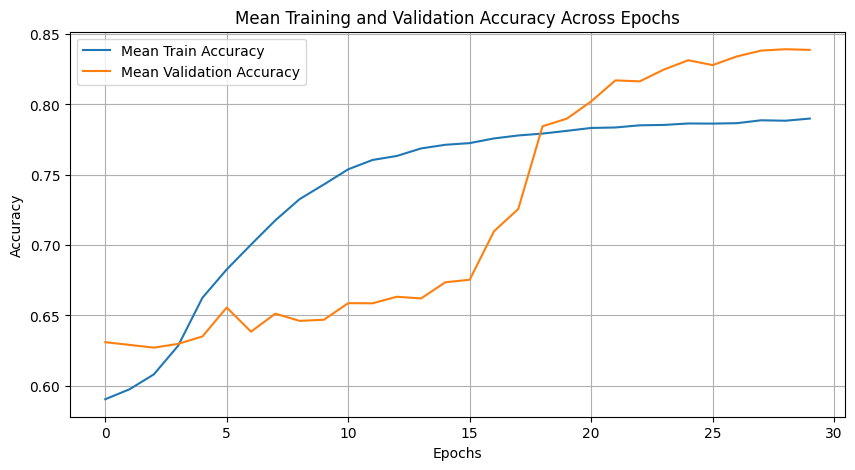

In [144]:
# Assuming history_list contains the training history for each fold
mean_train_accuracy = []
mean_val_accuracy = []

# Calculate mean accuracy for each epoch
for epoch in range(30):  # Assuming max 30 epochs
    epoch_train_acc = np.mean([history['accuracy'][epoch] for history in history_list if epoch < len(history['accuracy'])])
    epoch_val_acc = np.mean([history['val_accuracy'][epoch] for history in history_list if epoch < len(history['val_accuracy'])])
    mean_train_accuracy.append(epoch_train_acc)
    mean_val_accuracy.append(epoch_val_acc)

# Plot mean train and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(mean_train_accuracy, label='Mean Train Accuracy')
plt.plot(mean_val_accuracy, label='Mean Validation Accuracy')
plt.title('Mean Training and Validation Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# **Conclusion**

Data Overview: The dataset comprises records from the e-commerce industry, focusing on customer service interactions and CSAT scores. It contains 85907 rows and 20 columns, with missing values in several columns such as Customer_city, Product_category, and item_price.

CSAT Importance: CSAT is a crucial KPI for e-commerce businesses, reflecting customer satisfaction with products, services, and overall experience. Understanding CSAT is vital for driving business success.

Variable Insights: The dataset captures detailed information about customer service interactions, including customer feedback, order details, agent information, and timestamps. Understanding these variables provides valuable insights into customer satisfaction drivers.

Exploratory Data Analysis (EDA): EDA aims to gain insights into customer satisfaction patterns. Factors like response time, product category, channel effectiveness, agent tenure, shift timings, and customer feedback are analyzed to uncover potential reasons for CSAT scores.

Response Time Impact: Longer response times correlate with lower CSAT scores, indicating the need for quicker response mechanisms to improve customer satisfaction.
Product Category Analysis: Certain product categories consistently yield lower CSAT scores, suggesting issues with these products or their support processes that need addressing.

Agent Experience: Agents with longer tenures tend to receive higher CSAT scores, highlighting the importance of experience in delivering satisfactory customer service.

Shift Timings Influence: CSAT scores vary based on agent shift timings, indicating potential workload or resource issues during specific shifts that need attention.


CSAT Score vs. Item Price: A negative correlation between item price and CSAT score suggests that higher-priced items are associated with lower customer satisfaction. This finding underscores the importance of pricing strategies in maintaining high CSAT scores.

Data-driven Decision Making: Leveraging data insights from EDA enables data-driven decision-making processes, empowering businesses to implement strategies that positively impact CSAT scores and drive long-term success.


Response Time and CSAT Score: Statistical analysis indicates that a mean response time of less than 2 hours is significantly correlated with higher CSAT scores. This underscores the importance of prompt response times in enhancing customer satisfaction.

Price Impact on CSAT Score: Hypothesis testing suggests that items priced above a certain threshold do not significantly affect CSAT scores to go below 3. This finding provides insights into pricing strategies and their impact on customer satisfaction.


Data Preprocessing Techniques: Various techniques such as handling missing values, outlier detection, and categorical encoding were employed to ensure data quality and prepare it for analysis.

Feature Engineering: Feature manipulation, selection, and transformation techniques were utilized to create informative features and enhance the predictive power of the model.

Data Splitting for Training: A 70:30 ratio was chosen for data splitting to balance the trade-off between training and testing data size, considering the small training dataset.

Handling Imbalance in Target Variable: The Synthetic Minority Over-sampling Technique (SMOTE) was applied to address the imbalanced class distribution, ensuring robust model training.

Deep Learning Model Development: The development of a deep learning model using a neural network architecture, wrapped into a KerasClassifier, demonstrated promising performance in predicting CSAT scores, with an overall accuracy of approximately 85%.


### ***Hurrah! You have successfully completed your Deep Learning Capstone Project !!!***

In [148]:
scikeras_classifier.model_.save("csat_model.h5")